## Python Project EDA & Data Visualization - AirBnB Listing 2024(New York)


### Steps

##### 1. Importing all dependenices (libararies)
##### 2. loading datasets
##### 3. initial exploration
##### 4. Data cleaning
##### 5. Data Analysis

#### Step 1: Importing All Dependenices (Libararies)¶

In [496]:
!pip install kaggle
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Step 2: Downloading and Extracting Dataset from Kaggle


In [498]:
os.environ['KAGGLE_CONFIG_DIR'] = "C:/Users/.kaggle/kaggle.json"

In [499]:
!kaggle datasets download -d vrindakallu/new-york-dataset

Dataset URL: https://www.kaggle.com/datasets/vrindakallu/new-york-dataset
License(s): CC-BY-SA-4.0
new-york-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [503]:
print(os.listdir())

['.anaconda', '.android', '.bash_history', '.conda', '.condarc', '.continuum', '.emulator_console_auth_token', '.gitconfig', '.gradle', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.matplotlib', '.node_repl_history', '.opera', '.vscode', '3D Objects', 'airbnb_data_encoded.csv', 'anaconda3', 'anaconda_projects', 'Android Studio', 'AndroidStudioProjects', 'AppData', 'Application Data', 'churn_data', 'cleaned_airbnb_data.csv', 'cleaned_churn_data.csv', 'Contacts', 'Cookies', 'customer-churn-data', 'dim_host.csv', 'dim_license.csv', 'dim_location.csv', 'dim_property.csv', 'Documents', 'Downloads', 'fact_listing.csv', 'Favorites', 'IntelGraphicsProfiles', 'kaggle', 'Links', 'Local Settings', 'Music', 'My Application(0).zip', 'My Documents', 'NetHood', 'New York Airbnb Open Data 2024.ipynb', 'new-york-dataset.zip', 'Newyork_2024_clean.csv', 'Newyork_clean.csv', 'newyork_data', 'new_york', 'new_york_2024', 'npm-cache', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.D

In [505]:
import zipfile

with zipfile.ZipFile("new-york-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("newyork_data")  # This will create a folder and extract contents


In [507]:
print(os.listdir("newyork_data"))

['.ipynb_checkpoints', 'new_york_listings_2024.csv']


#### Step 3: Initial Exploration

In [510]:
data = pd.read_csv('newyork_data/new_york_listings_2024.csv', encoding_errors='ignore')

In [512]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [514]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20753,24736896,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,2023-09-29,1.81,1,157,12,No License,4.75,1,1,1
20754,2835711,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,2023-07-01,0.48,1,0,1,No License,4.46,1,2,1
20755,51825274,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,2023-12-08,2.09,1,0,27,No License,4.93,1,1,1
20756,782661008019550832,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,2023-09-17,0.91,1,363,7,No License,5.0,1,1,1
20757,566029911248687183,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,...,2023-12-10,4.50,1,0,62,OSE-STRREG-0000513,4.89,1,1,1


In [516]:
data.shape

(20758, 22)

In [518]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

#### Step 4: Data Cleaning

#### Column-level cleanup and Fix Inconsistencies (e.g., 'Studio', 'Yes'/'yes'/'Y')

In [522]:
# Step 1: Create 'is_studio' flag
data['is_studio'] = data['bedrooms'].astype(str).str.strip().str.lower().apply(lambda x: 1 if x == 'studio' else 0)

# Step 2: Create 'bedrooms_clean' column
data['bedrooms_clean'] = data['bedrooms'].astype(str).str.strip().str.lower().replace('studio', '0')

# Step 3: Convert 'bedrooms_clean' to numeric
data['bedrooms_clean'] = pd.to_numeric(data['bedrooms_clean'], errors='coerce')

# Step 4: View all columns 
data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,is_studio,bedrooms_clean
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,1,0,0,No License,5.0,1,1,Not specified,0,1
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,139,364,2,No License,4.67,2,1,1,0,2
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1,343,6,Exempt,4.17,1,2,1,0,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2,363,12,No License,4.64,1,1,1,0,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,133,335,3,No License,4.91,Studio,1,1,1,0


In [524]:
# After fixing the inconsistencies check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

####  Handle Missing Values

In [527]:
data.isnull().sum()

# dropping all missing values rows
data.dropna(inplace=True)

# data.fillna()
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
is_studio                         0
bedrooms_clean                    0
dtype: int64

#### Remove duplicates

In [530]:
# dealing with duplicates rows
data.duplicated().sum()

# deleting all duplicated rows
# data[data.duplicated()]

data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

#### Convert data types

In [533]:
#check the datatypes
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
is_studio                           int64
bedrooms_clean                    

In [535]:
# 1. Convert date column
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# 2. Convert rating and baths to float (for numeric analysis)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['baths'] = pd.to_numeric(data['baths'], errors='coerce')

# 3. Keep 'bedrooms' as object (already raw with 'Studio'), no change needed

# 4. Ensure 'bedrooms_clean' is nullable integer
data['bedrooms_clean'] = pd.to_numeric(data['bedrooms_clean'], errors='coerce').astype('Int64')

# Optional: Check final dtypes
print(data.dtypes)



id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
rating                                   float64
bedrooms                                  object
beds                

#### Handle outliers

In [538]:
# IQR method for 'price'
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
data_cleaned = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

print(f"Original rows: {data.shape[0]}")
print(f"Cleaned rows: {data_cleaned.shape[0]}")


Original rows: 20758
Cleaned rows: 19373


In [540]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20758 non-null  int64         
 1   name                            20758 non-null  object        
 2   host_id                         20758 non-null  int64         
 3   host_name                       20758 non-null  object        
 4   neighbourhood_group             20758 non-null  object        
 5   neighbourhood                   20758 non-null  object        
 6   latitude                        20758 non-null  float64       
 7   longitude                       20758 non-null  float64       
 8   room_type                       20758 non-null  object        
 9   price                           20758 non-null  float64       
 10  minimum_nights                  20758 non-null  int64         
 11  nu

#### Step 5: Exploratory Data Analysis

#### Univariate Analysis (Numerical Variables)

In [544]:

# Select all numeric columns
numerical_cols = data.select_dtypes(include=['int64', 'float64', 'Int64']).columns
print(" Numerical Columns:\n", numerical_cols.tolist())


 Numerical Columns:
 ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'rating', 'beds', 'baths', 'is_studio', 'bedrooms_clean']


#### Descriptive Statistics ( Numerical Values)

In [547]:
# Display descriptive stats for all numerical variables
print(" Descriptive Statistics for Numerical Variables:\n")
data[numerical_cols].describe().T


 Descriptive Statistics for Numerical Variables:



,count,mean,std,min,25%,50%,75%,max
id,20758.0,303404386773971136.0,390121559478711552.0,2595.0,27088080.0,49930032.5,721601888994556672.0,1054375518474819584.0
host_id,20758.0,174931562.15093,172554113.313155,1678.0,20417384.5,108727121.0,314410176.0,550403525.0
latitude,20758.0,40.726798,0.060294,40.500314,40.68415,40.72282,40.763098,40.911147
longitude,20758.0,-73.939161,0.061403,-74.24984,-73.98071,-73.949587,-73.91746,-73.71365
price,20758.0,187.776616,1022.797208,10.0,80.0,125.0,199.0,100000.0
minimum_nights,20758.0,28.558435,33.536518,1.0,30.0,30.0,30.0,1250.0
number_of_reviews,20758.0,42.642596,73.561654,1.0,4.0,14.0,49.0,1865.0
reviews_per_month,20758.0,1.25791,1.904661,0.01,0.21,0.65,1.8,75.49
calculated_host_listings_count,20758.0,18.844108,70.910834,1.0,1.0,2.0,5.0,713.0
availability_365,20758.0,205.990317,135.087768,0.0,87.0,215.0,353.0,365.0


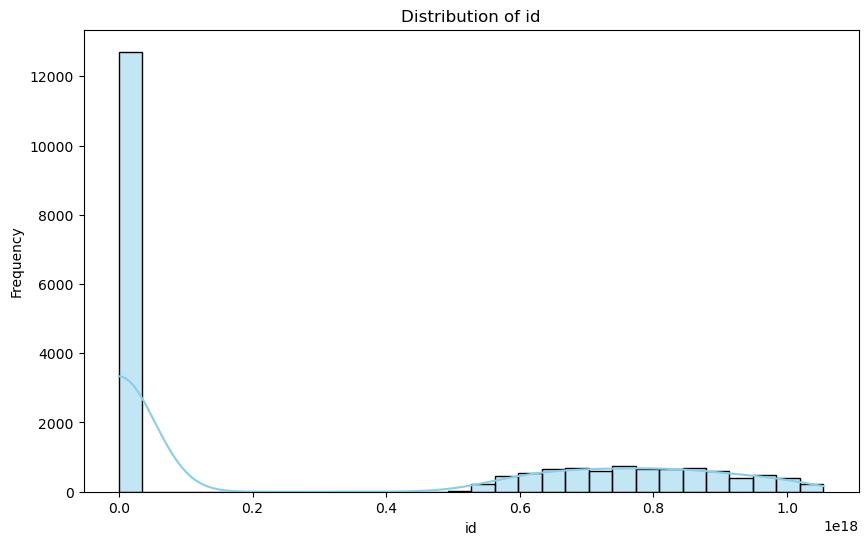

In [549]:
# Histogram for 'id'
plt.figure(figsize=(10, 6))
sns.histplot(data['id'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of id')
plt.xlabel('id')
plt.ylabel('Frequency')
plt.show()

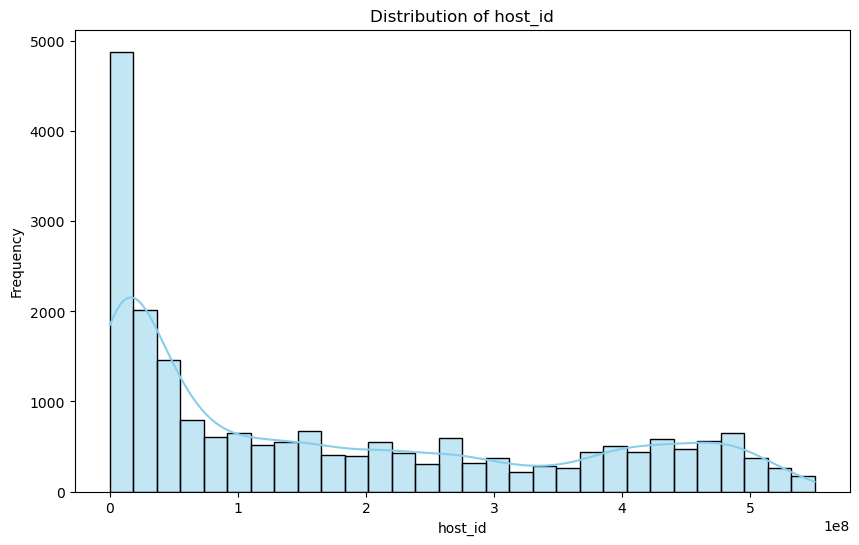

In [551]:
# Histogram for 'host_id'
plt.figure(figsize=(10, 6))
sns.histplot(data['host_id'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of host_id')
plt.xlabel('host_id')
plt.ylabel('Frequency')
plt.show()



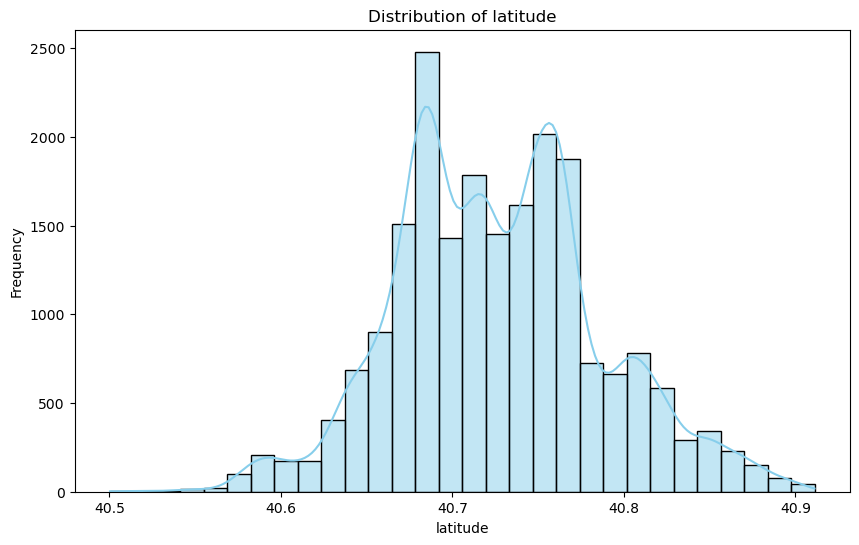

In [553]:
# Histogram for 'latitude'
plt.figure(figsize=(10, 6))
sns.histplot(data['latitude'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of latitude')
plt.xlabel('latitude')
plt.ylabel('Frequency')
plt.show()


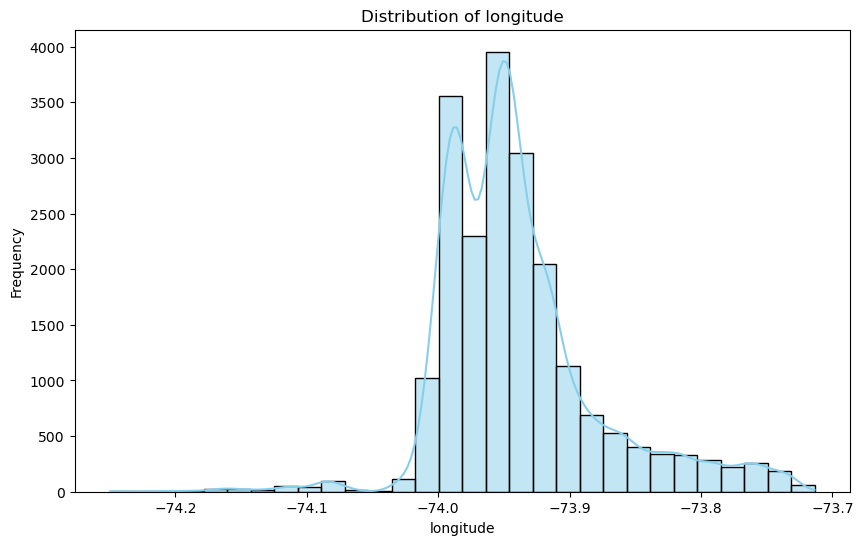

In [555]:
# Histogram for 'longitude'
plt.figure(figsize=(10, 6))
sns.histplot(data['longitude'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of longitude')
plt.xlabel('longitude')
plt.ylabel('Frequency')
plt.show()


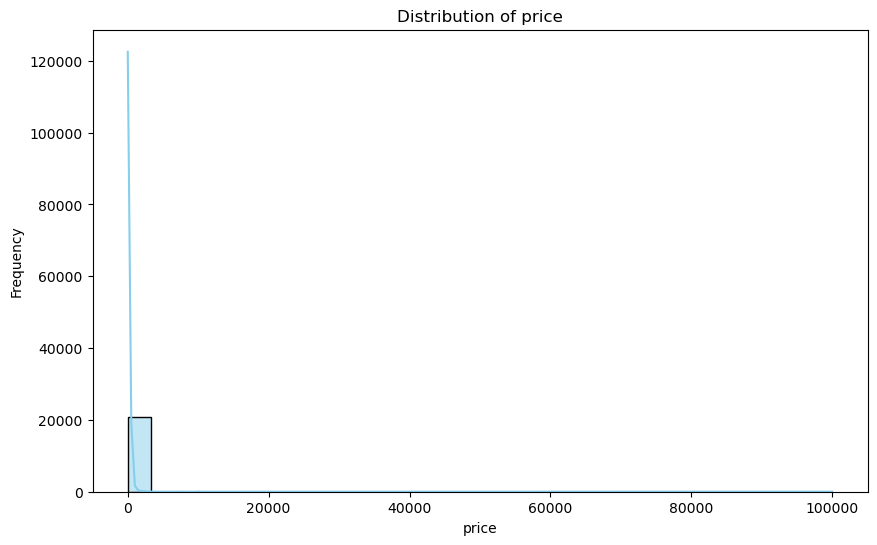

In [557]:
# Histogram for 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()


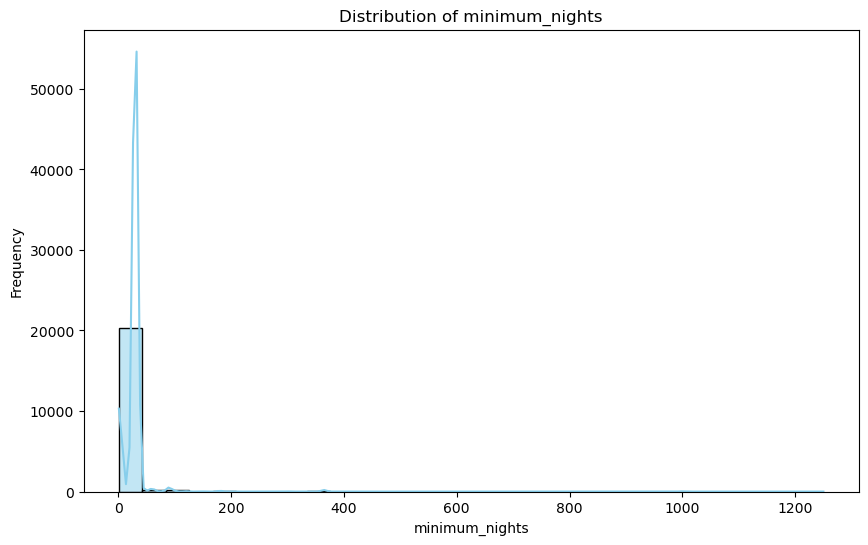

In [558]:
# Histogram for 'minimum_nights'
plt.figure(figsize=(10, 6))
sns.histplot(data['minimum_nights'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of minimum_nights')
plt.xlabel('minimum_nights')
plt.ylabel('Frequency')
plt.show()


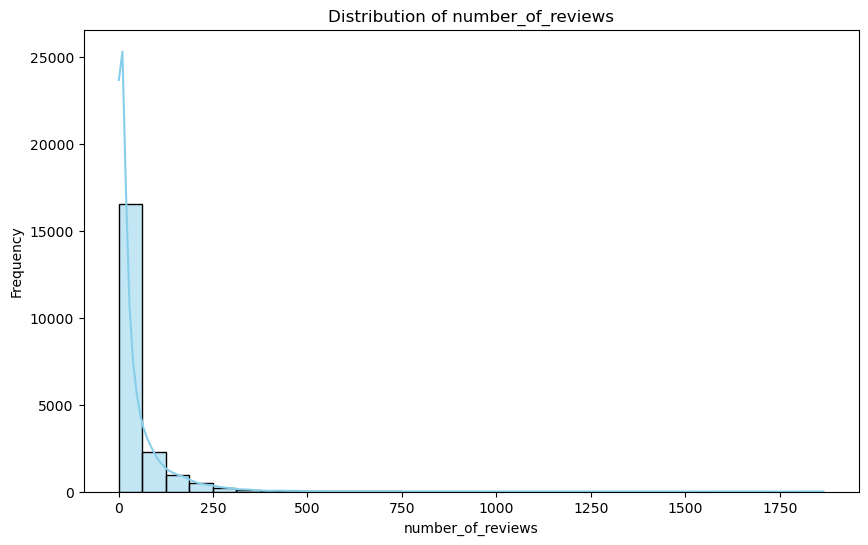

In [560]:
# Histogram for 'number_of_reviews'
plt.figure(figsize=(10, 6))
sns.histplot(data['number_of_reviews'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of number_of_reviews')
plt.xlabel('number_of_reviews')
plt.ylabel('Frequency')
plt.show()




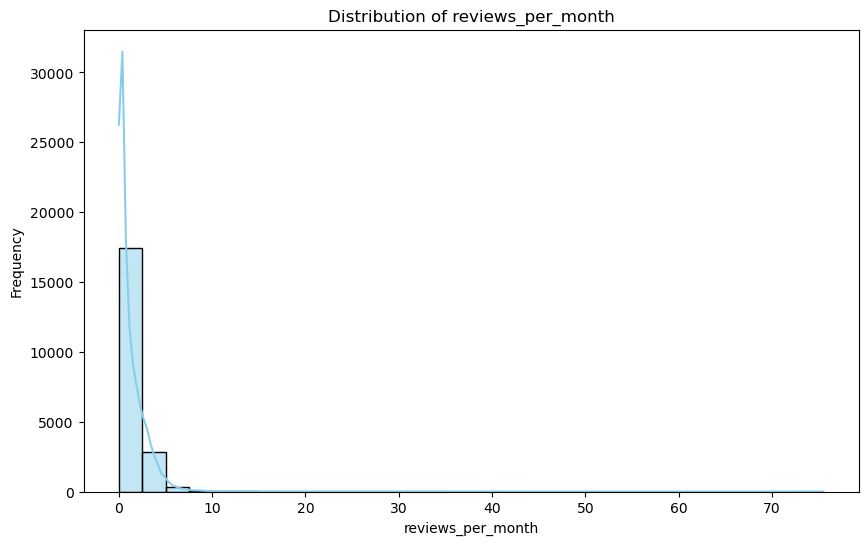

In [563]:
# Histogram for 'reviews_per_month'
plt.figure(figsize=(10, 6))
sns.histplot(data['reviews_per_month'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of reviews_per_month')
plt.xlabel('reviews_per_month')
plt.ylabel('Frequency')
plt.show()


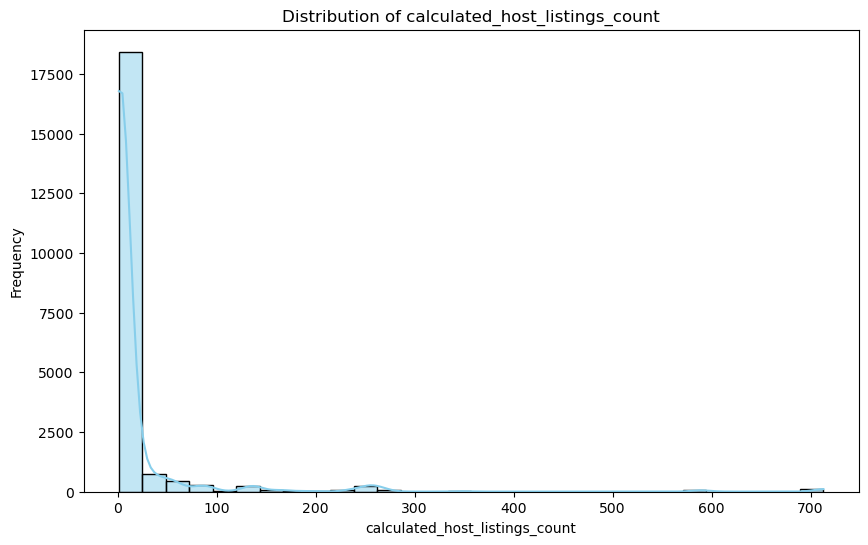

In [564]:
# Histogram for 'calculated_host_listings_count'
plt.figure(figsize=(10, 6))
sns.histplot(data['calculated_host_listings_count'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of calculated_host_listings_count')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Frequency')
plt.show()


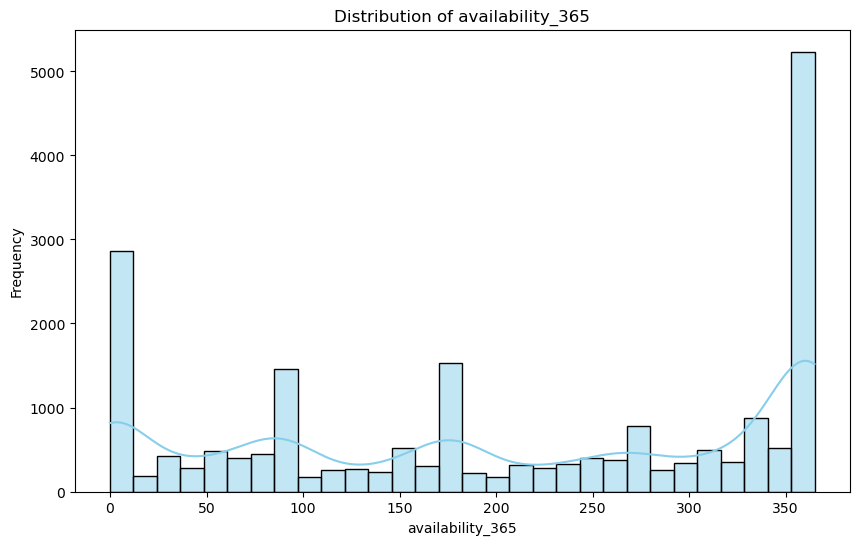

In [567]:
# Histogram for 'availability_365'
plt.figure(figsize=(10, 6))
sns.histplot(data['availability_365'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of availability_365')
plt.xlabel('availability_365')
plt.ylabel('Frequency')
plt.show()


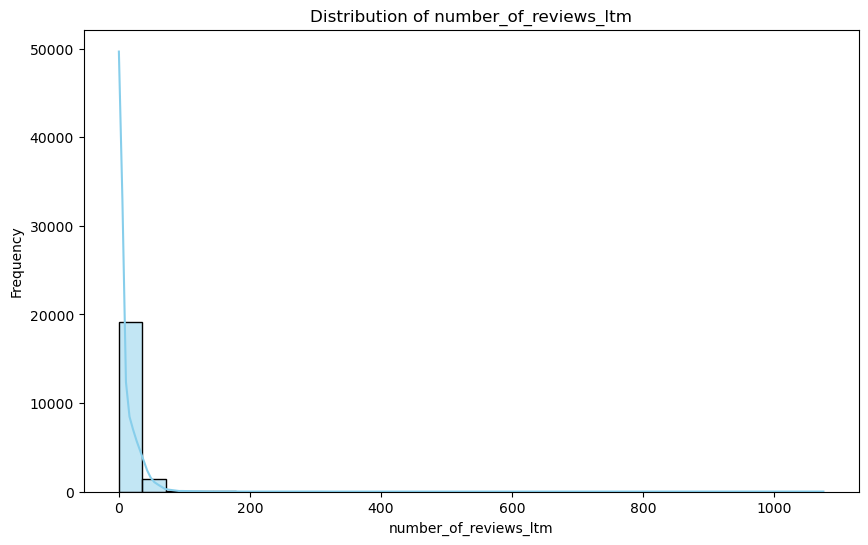

In [569]:
# Histogram for 'number_of_reviews_ltm'
plt.figure(figsize=(10, 6))
sns.histplot(data['number_of_reviews_ltm'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of number_of_reviews_ltm')
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('Frequency')
plt.show()


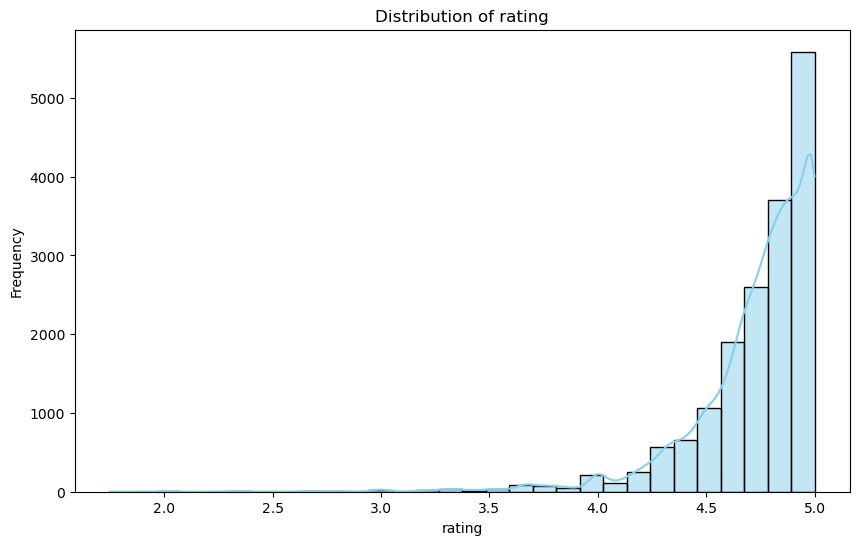

In [571]:
# Histogram for 'rating'
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of rating')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()


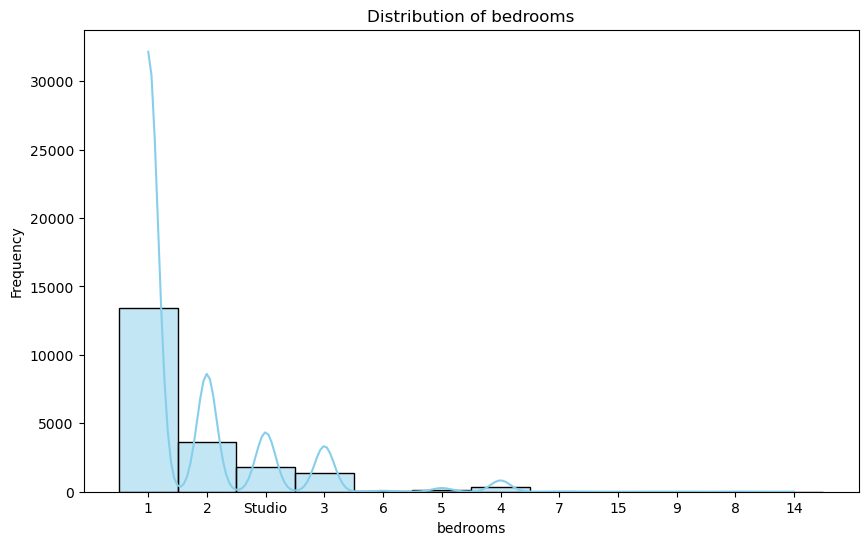

In [573]:
# Histogram for 'bedrooms'
plt.figure(figsize=(10, 6))
sns.histplot(data['bedrooms'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Frequency')
plt.show()


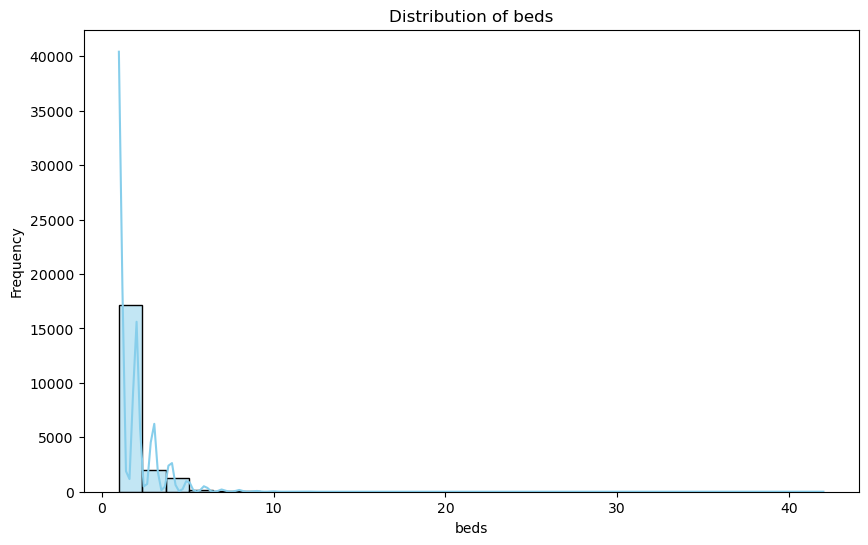

In [575]:
# Histogram for 'beds'
plt.figure(figsize=(10, 6))
sns.histplot(data['beds'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of beds')
plt.xlabel('beds')
plt.ylabel('Frequency')
plt.show()


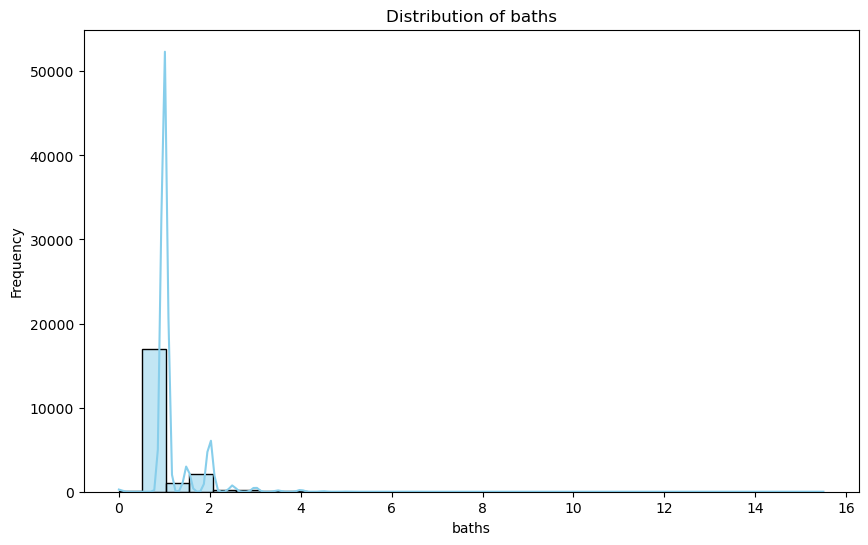

In [577]:
# Histogram for 'baths'
plt.figure(figsize=(10, 6))
sns.histplot(data['baths'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of baths')
plt.xlabel('baths')
plt.ylabel('Frequency')
plt.show()


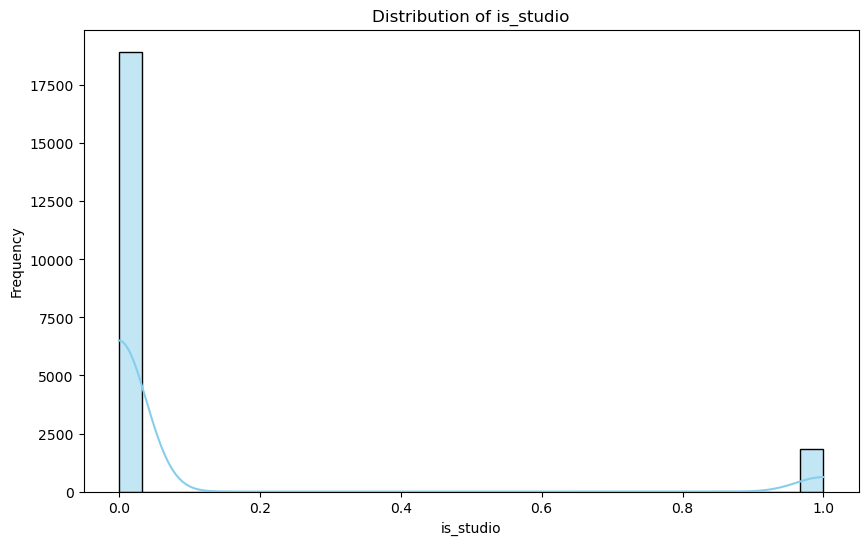

In [579]:
# Histogram for 'is_studio'
plt.figure(figsize=(10, 6))
sns.histplot(data['is_studio'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of is_studio')
plt.xlabel('is_studio')
plt.ylabel('Frequency')
plt.show()


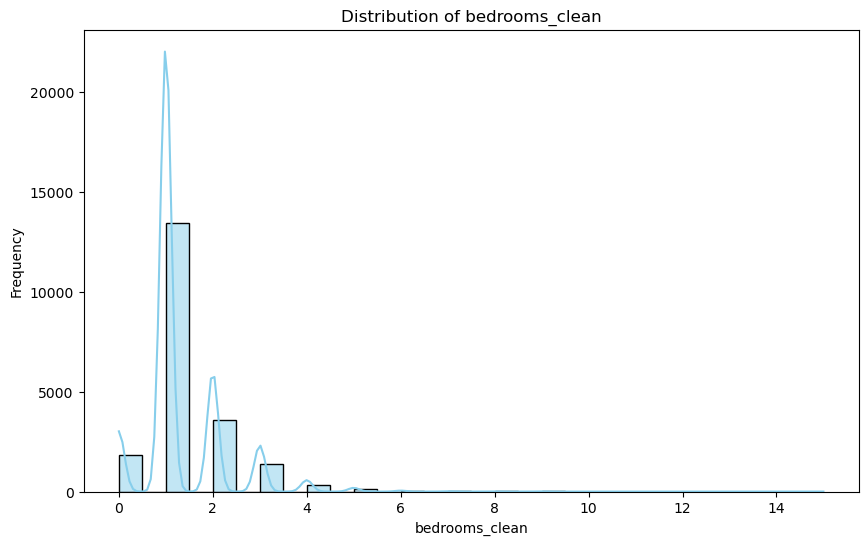

In [581]:
# Histogram for 'bedrooms_clean'
plt.figure(figsize=(10, 6))
sns.histplot(data['bedrooms_clean'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of bedrooms_clean')
plt.xlabel('bedrooms_clean')
plt.ylabel('Frequency')
plt.show()


#### Univariate Analysis (Categorical Variables)

In [584]:
categorical_cols = data.select_dtypes(include='object').columns
print("Categorical Columns:\n", categorical_cols.tolist())

Categorical Columns:
 ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'license', 'bedrooms']


#### Descriptive statistics (Categorical Variables)

In [587]:
# Descriptive statistics for all categorical variables
print("\nDescriptive Statistics for Categorical Variables:\n")
data[categorical_cols].describe().T



Descriptive Statistics for Categorical Variables:



,count,unique,top,freq
name,20758,9836,Rental unit in New York · 1 bedroom · 1 bed · ...,409
host_name,20758,5815,Jeniffer,184
neighbourhood_group,20758,5,Manhattan,8038
neighbourhood,20758,221,Bedford-Stuyvesant,1586
room_type,20758,4,Entire home/apt,11549
license,20758,879,No License,17569
bedrooms,20758,12,1,13439


####  Name (Top 20 to avoid overplotting)

C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\520565149.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




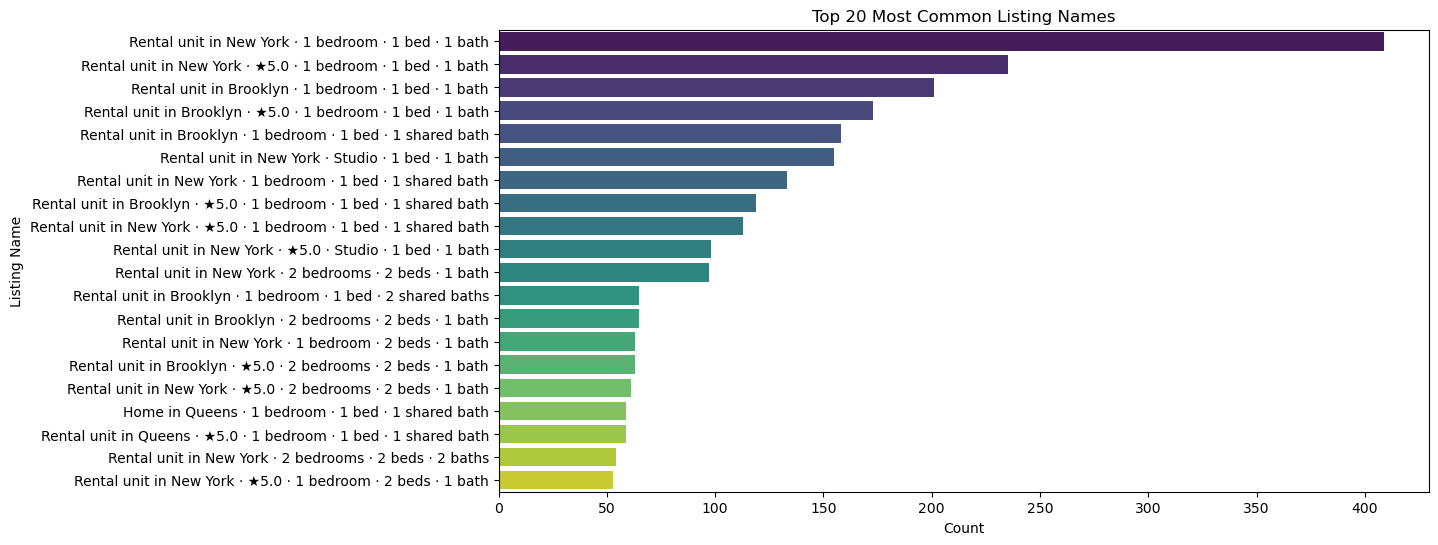

In [590]:
plt.figure(figsize=(12, 6))
top_names = data['name'].value_counts().nlargest(20)
sns.barplot(x=top_names.values, y=top_names.index, palette='viridis')
plt.title('Top 20 Most Common Listing Names')
plt.xlabel('Count')
plt.ylabel('Listing Name')
plt.show()


#### Host_name (Top 20)

C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\503480250.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




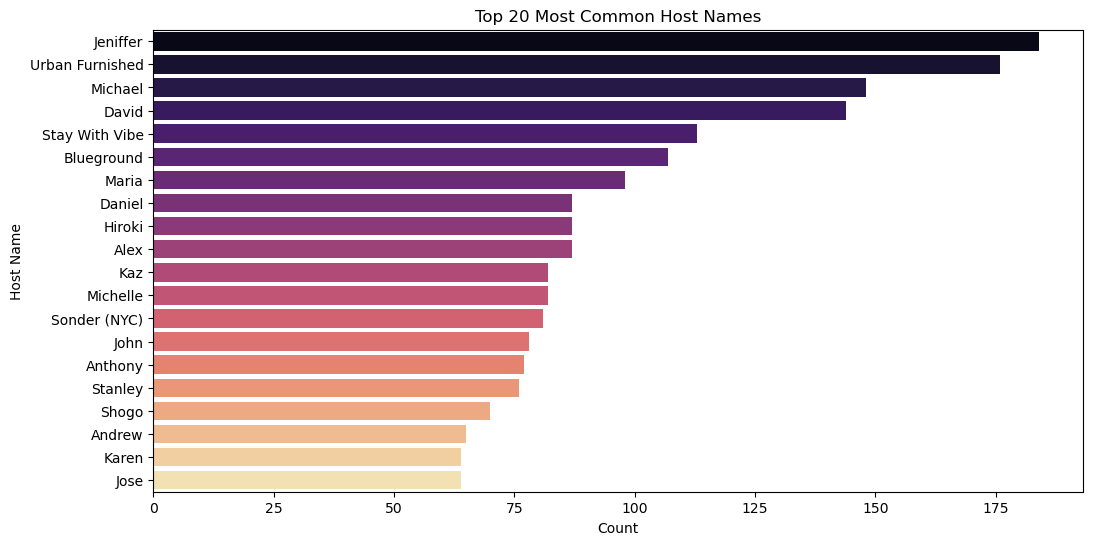

In [593]:
plt.figure(figsize=(12, 6))
top_hosts = data['host_name'].value_counts().nlargest(20)
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='magma')
plt.title('Top 20 Most Common Host Names')
plt.xlabel('Count')
plt.ylabel('Host Name')
plt.show()


#### Neighbourhood_group

C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\150905819.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




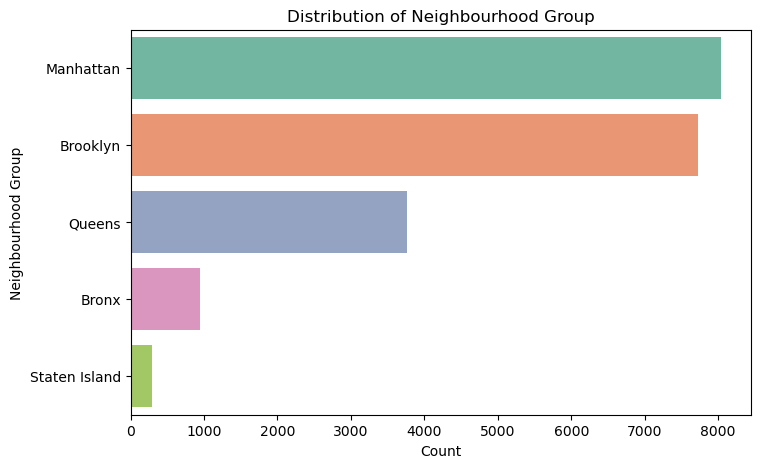

In [596]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='neighbourhood_group', order=data['neighbourhood_group'].value_counts().index, palette='Set2')
plt.title('Distribution of Neighbourhood Group')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.show()



#### neighbourhood (Top 20)

C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\2271951962.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




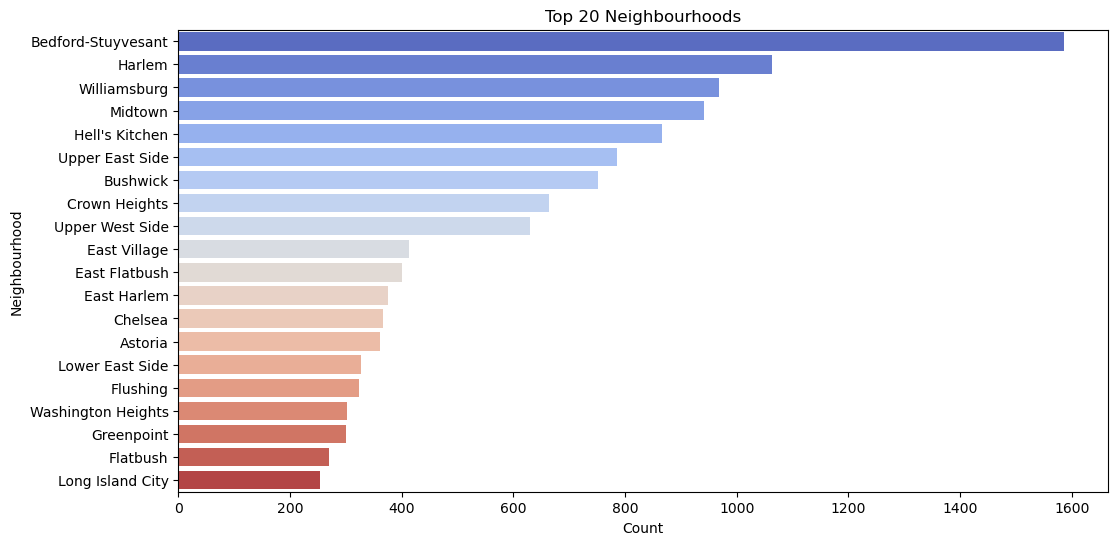

In [599]:
plt.figure(figsize=(12, 6))
top_hoods = data['neighbourhood'].value_counts().nlargest(20)
sns.barplot(x=top_hoods.values, y=top_hoods.index, palette='coolwarm')
plt.title('Top 20 Neighbourhoods')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()


#### Room_type

C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\3102829444.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




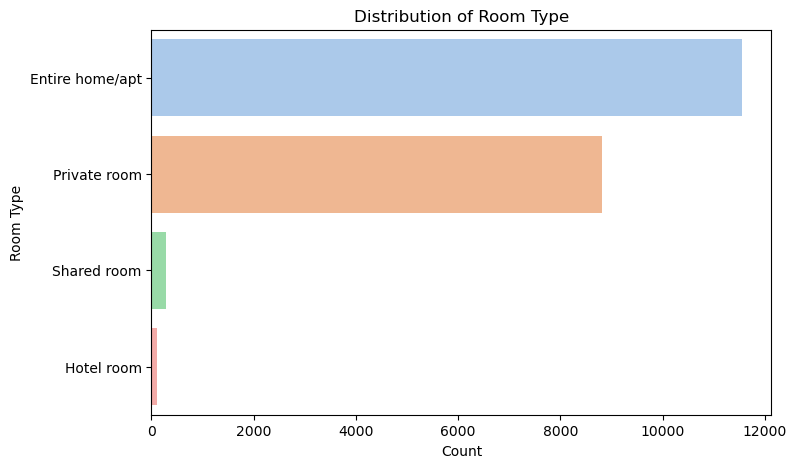

In [602]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='room_type', order=data['room_type'].value_counts().index, palette='pastel')
plt.title('Distribution of Room Type')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()


#### License

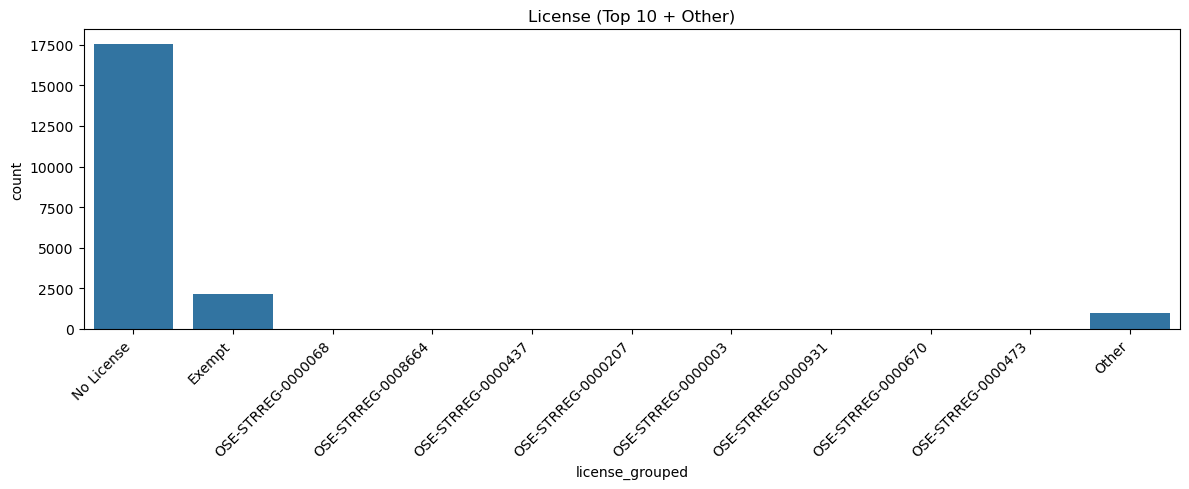

In [605]:
# Group rare licenses into “Other”
TOP_N = 10
license_counts = data['license'].value_counts()
top_n = license_counts.nlargest(TOP_N).index

data['license_grouped'] = data['license'].where(
    data['license'].isin(top_n),
    other='Other'
)

plt.figure(figsize=(12,5))
sns.countplot(
    data=data,
    x='license_grouped',
    order=list(top_n) + ['Other']
)
plt.title(f'License (Top {TOP_N} + Other)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### Bedrooms (Raw object values including "Studio")

C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\1250717238.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




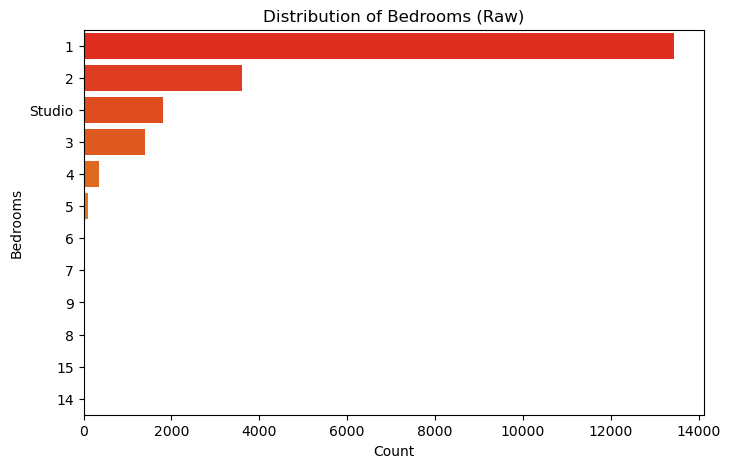

In [608]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='bedrooms', order=data['bedrooms'].astype(str).value_counts().index, palette='autumn')
plt.title('Distribution of Bedrooms (Raw)')
plt.xlabel('Count')
plt.ylabel('Bedrooms')
plt.show()


#### Bivariate Analysis 

In [611]:
# Numerical columns
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews',
                  'reviews_per_month', 'calculated_host_listings_count',
                  'availability_365', 'number_of_reviews_ltm', 'rating',
                  'beds', 'baths', 'bedrooms_clean']

# Categorical columns
categorical_cols = ['room_type', 'neighbourhood_group', 'is_studio']


#### Numerical vs Numerical (Correlation Heatmap)

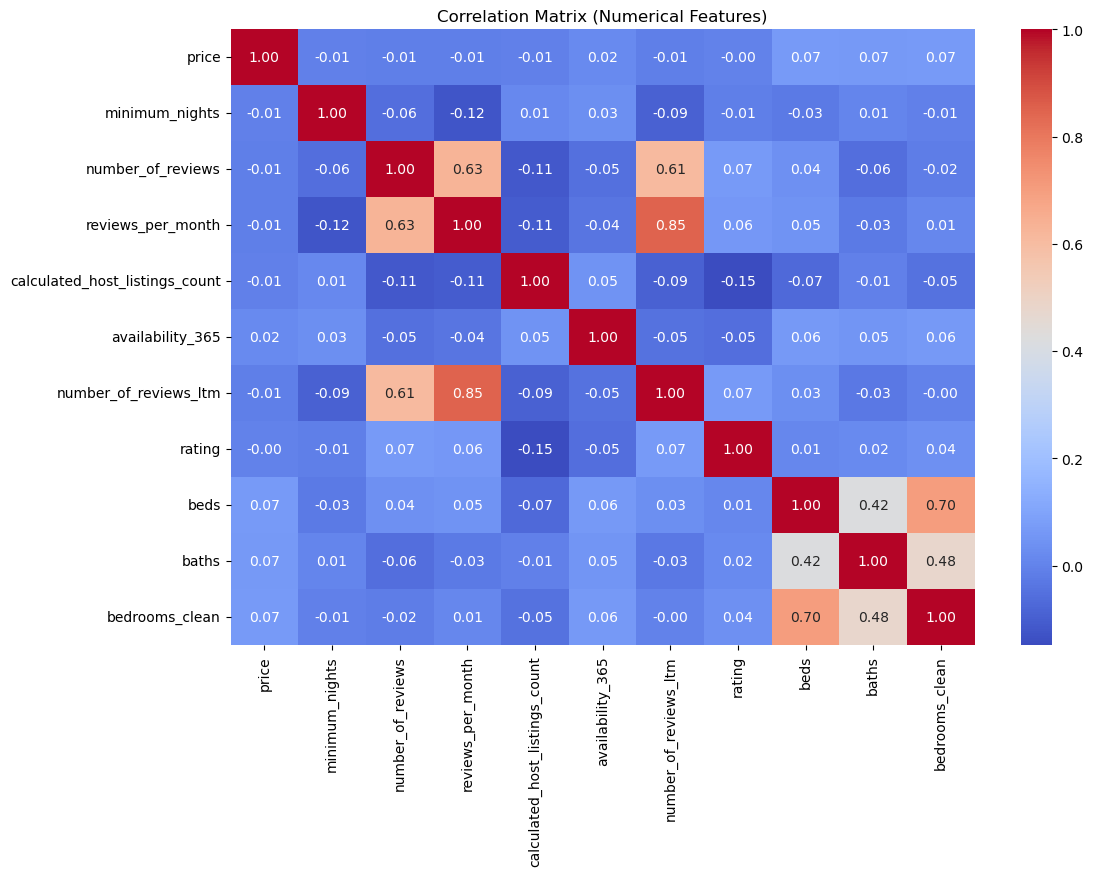

In [614]:
plt.figure(figsize=(12, 8))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


#### Categorical vs Numerical (Boxplots)

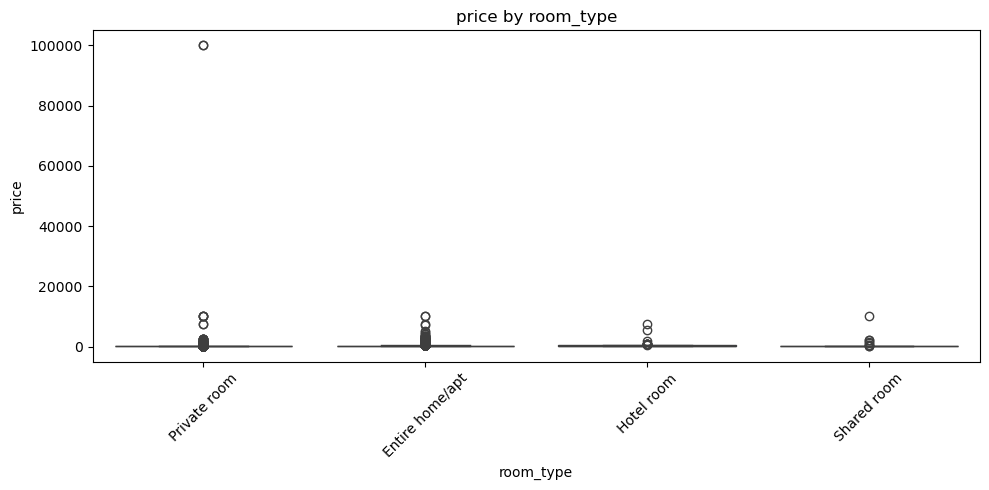

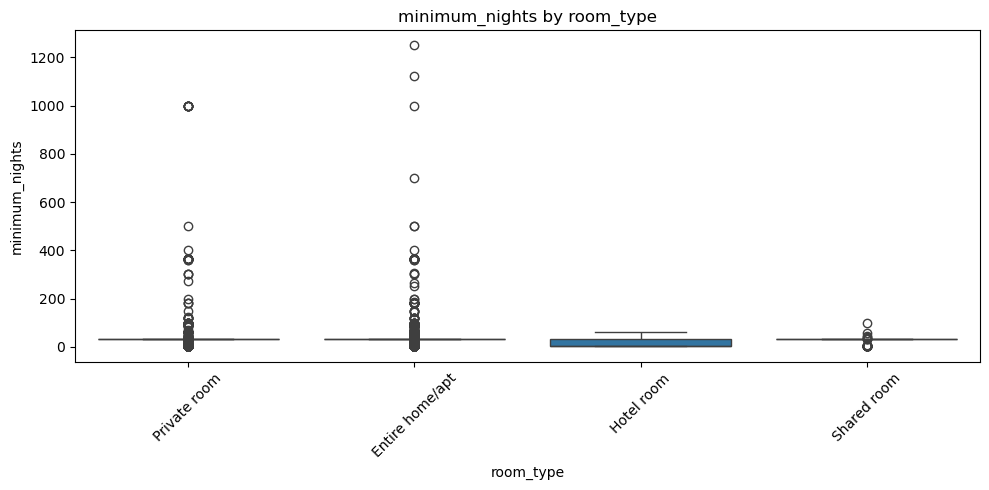

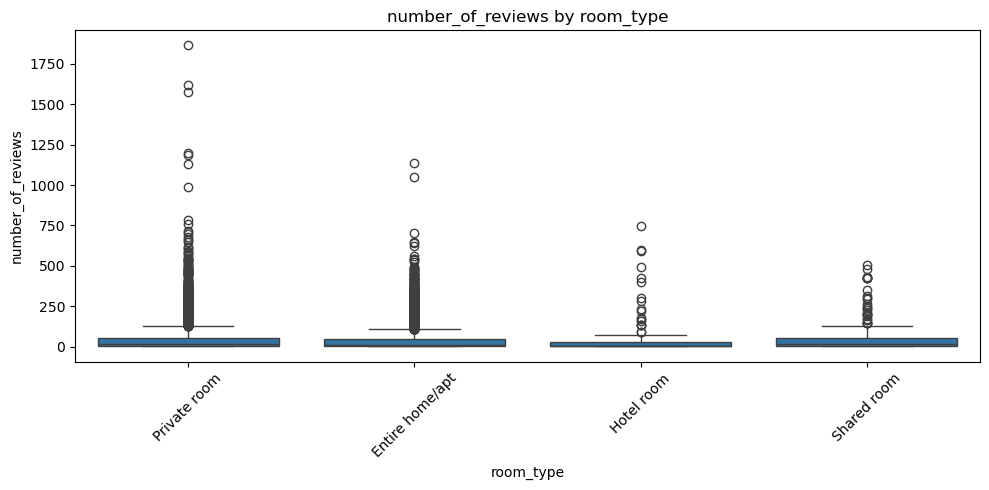

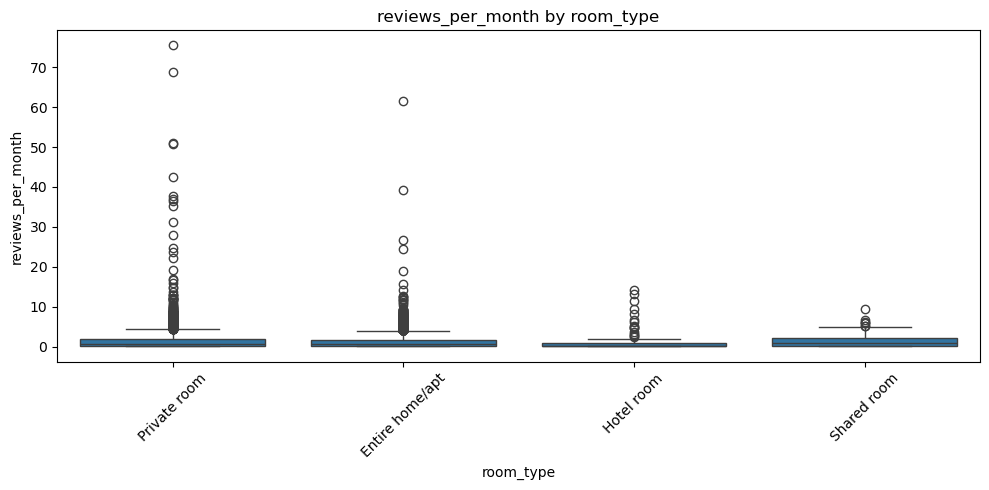

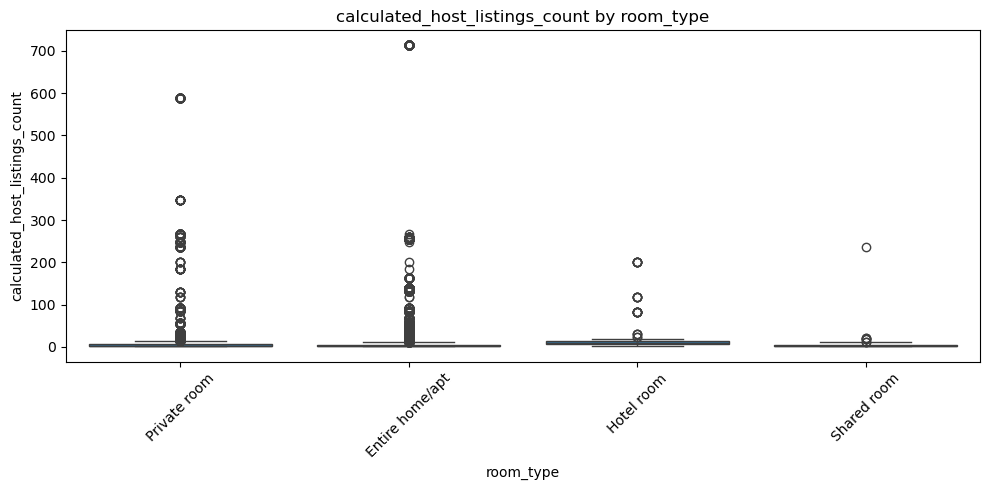

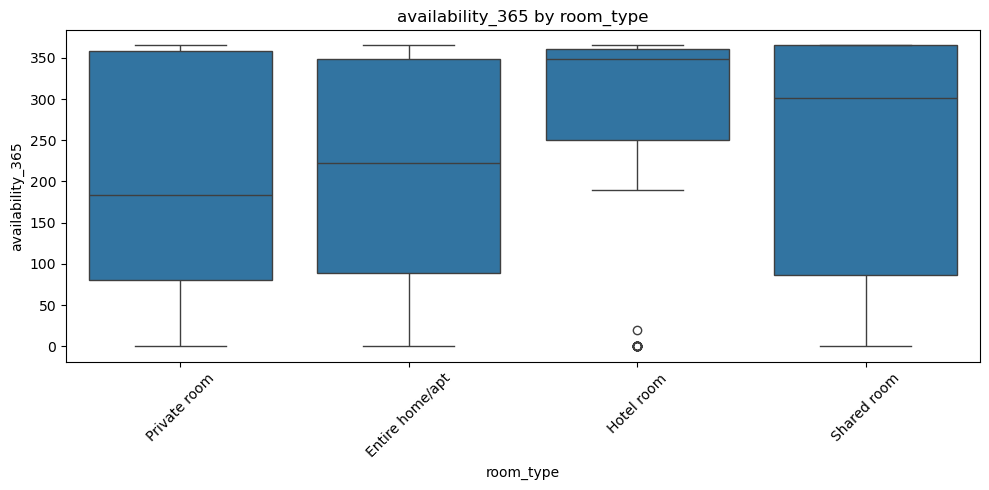

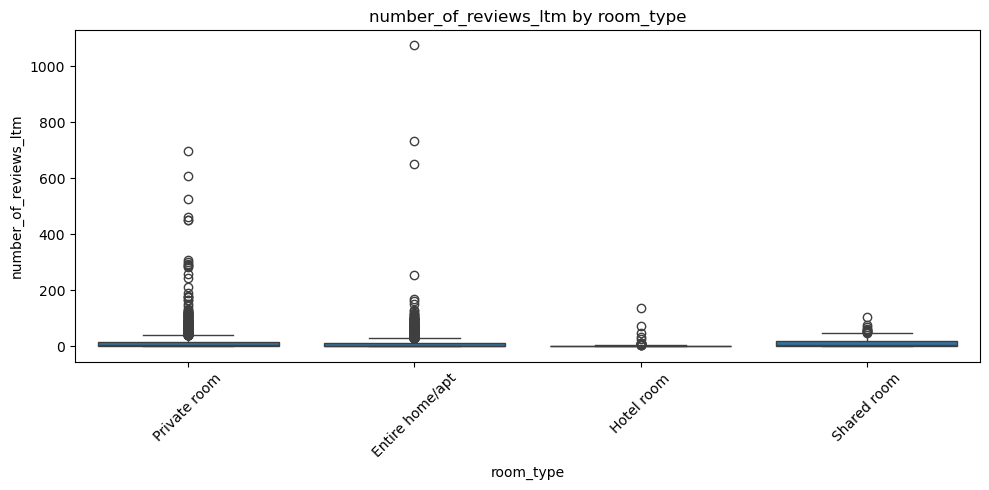

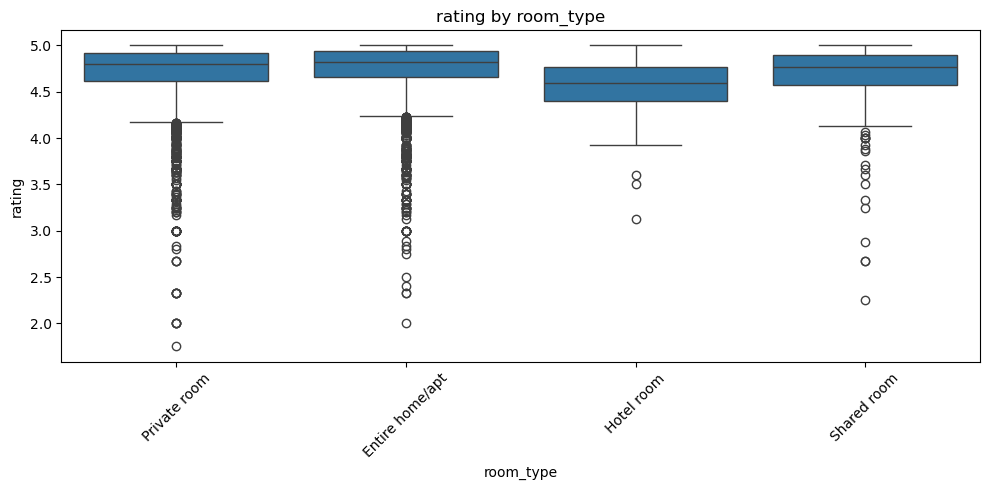

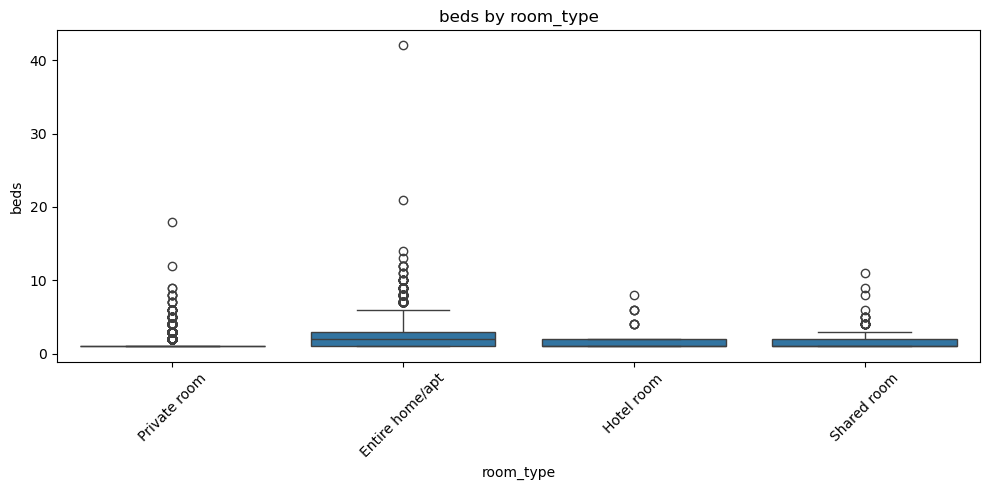

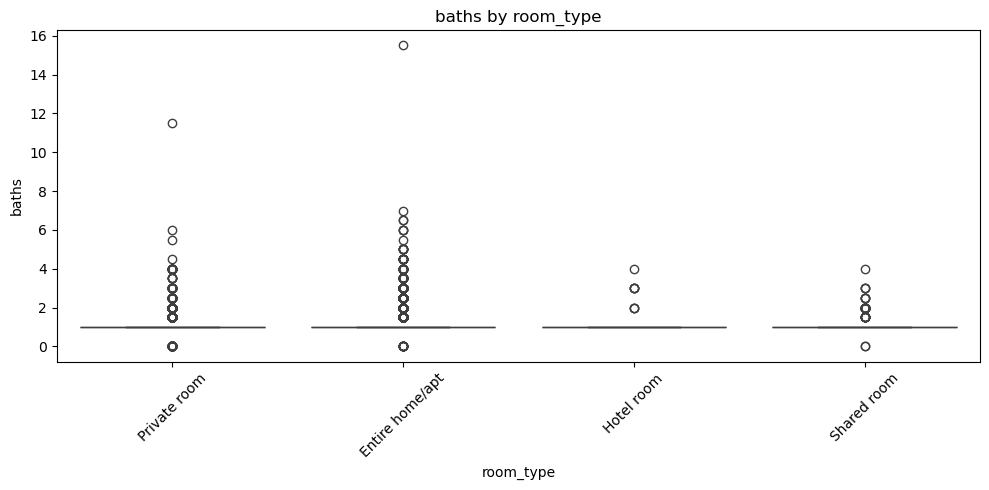

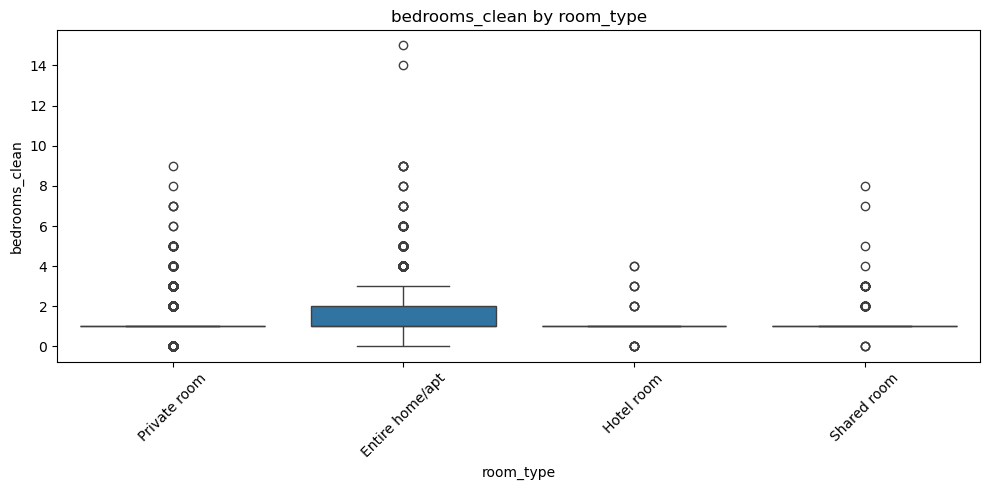

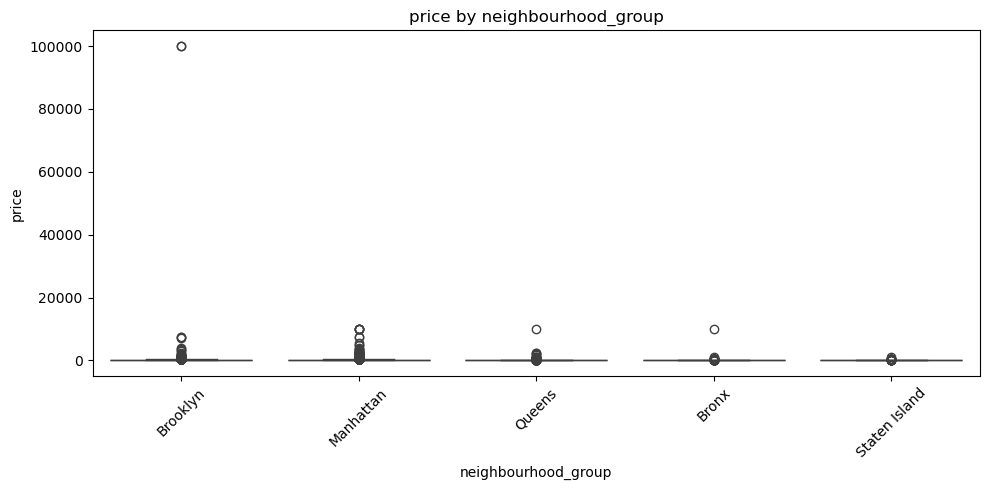

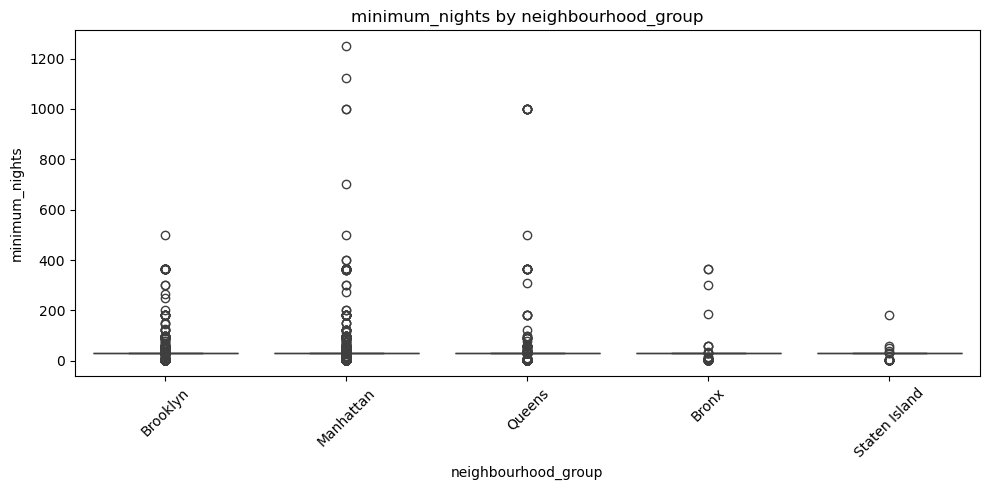

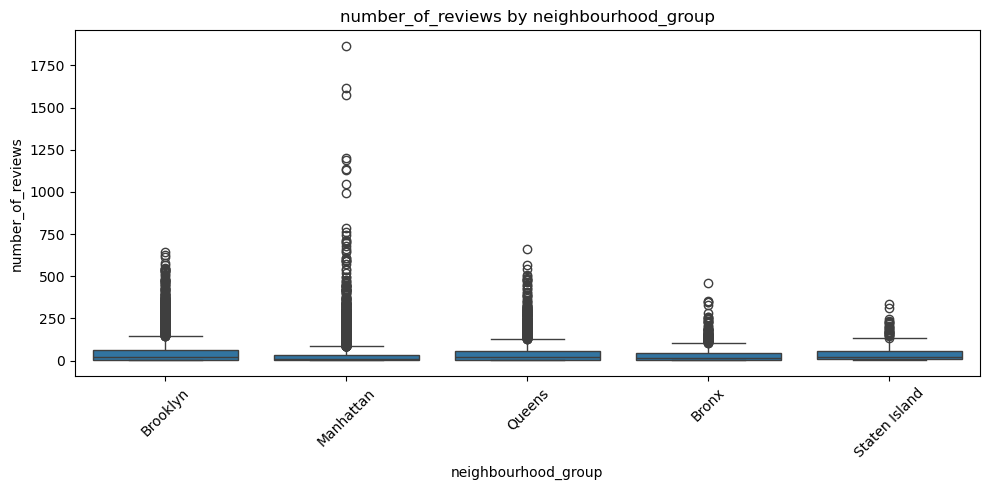

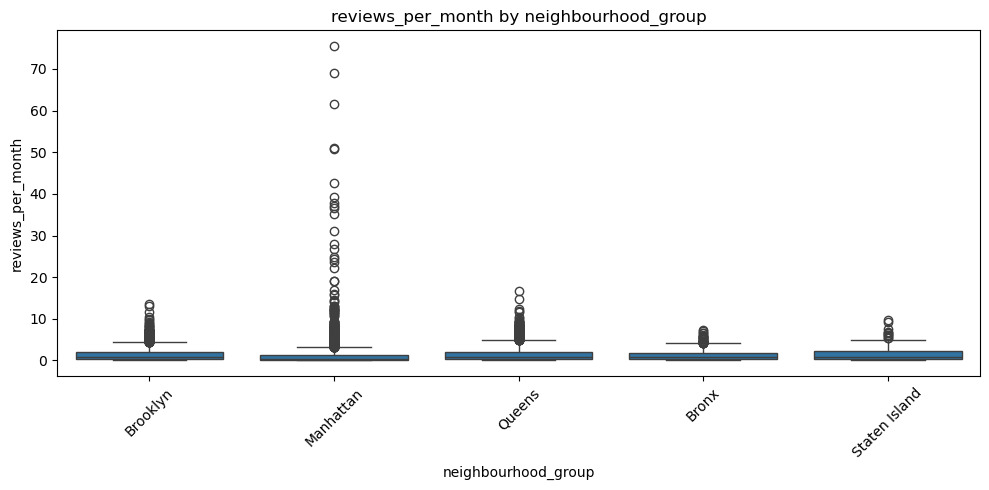

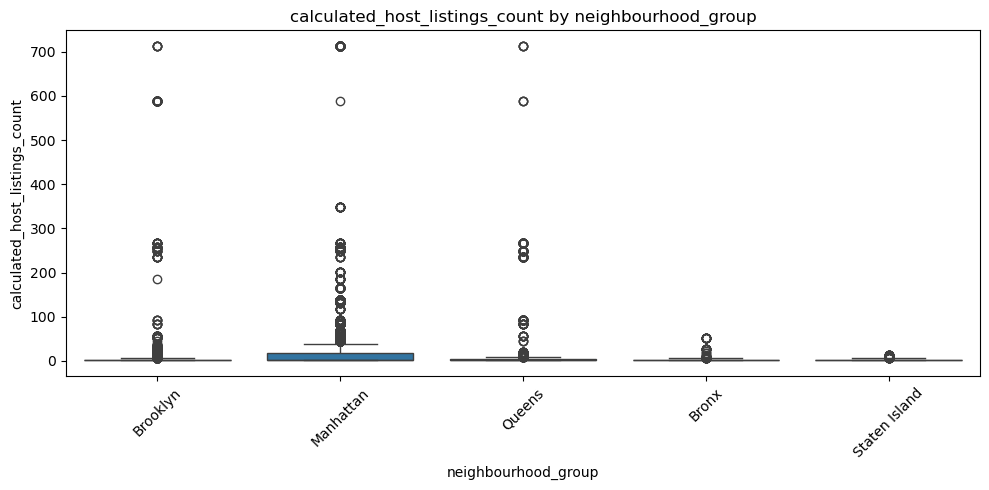

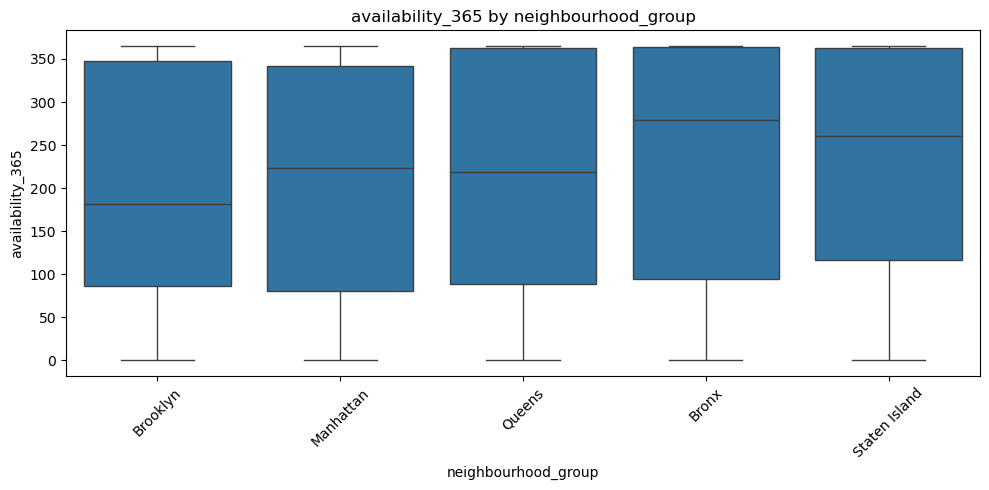

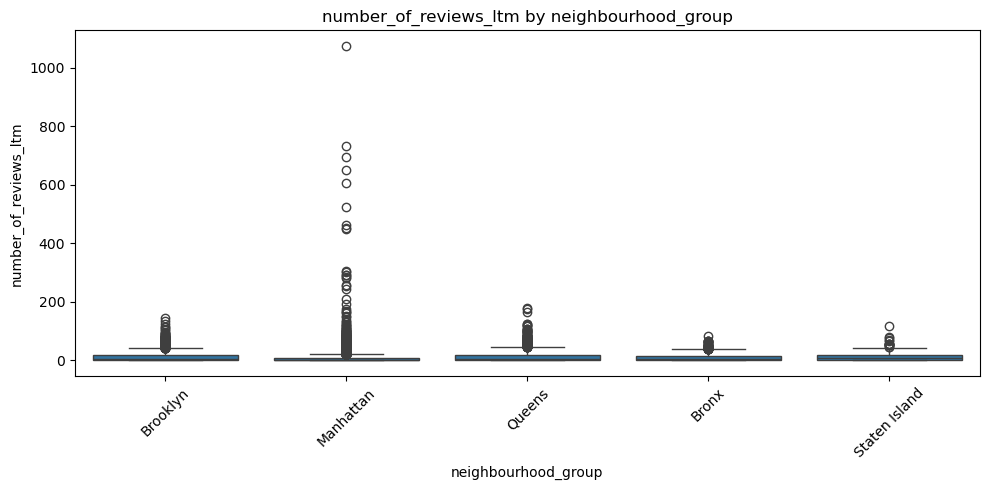

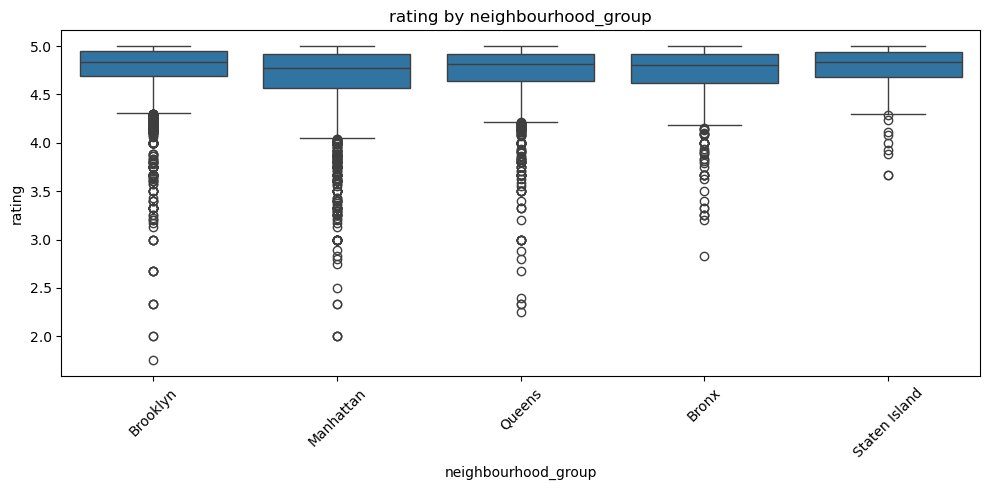

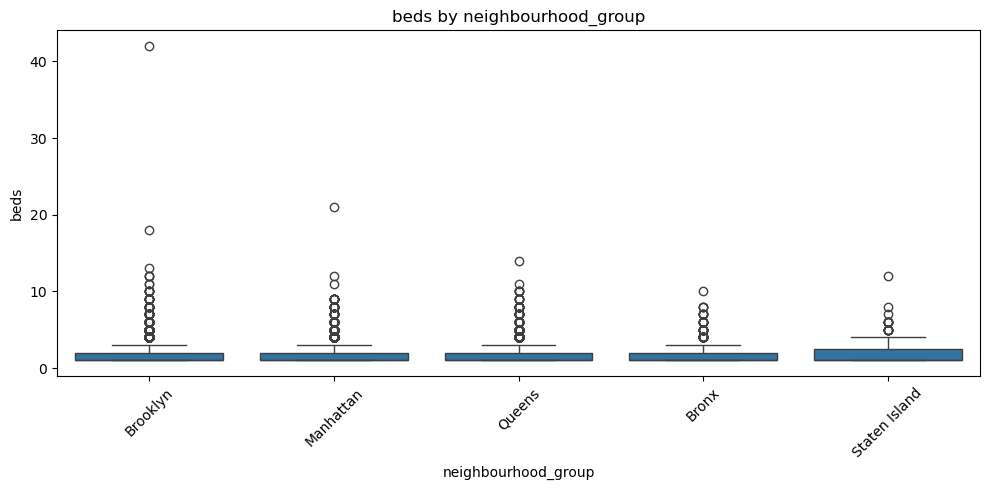

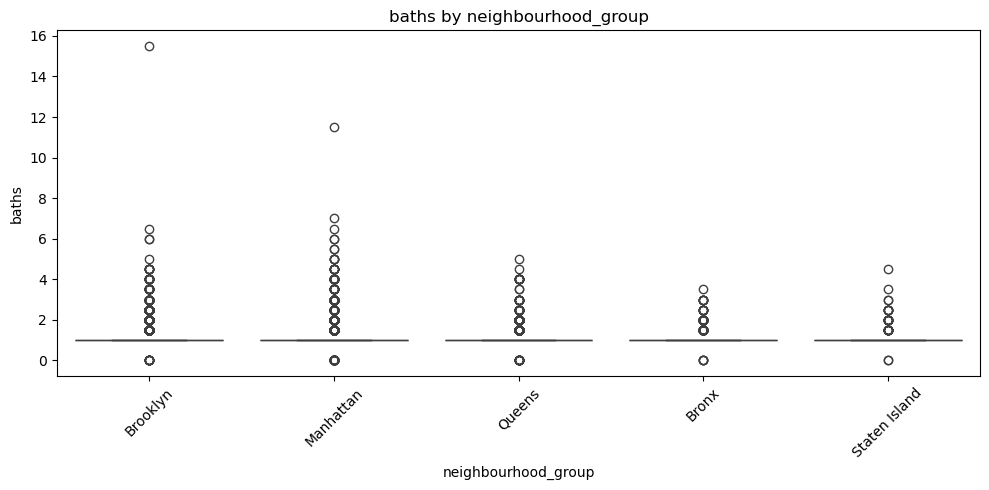

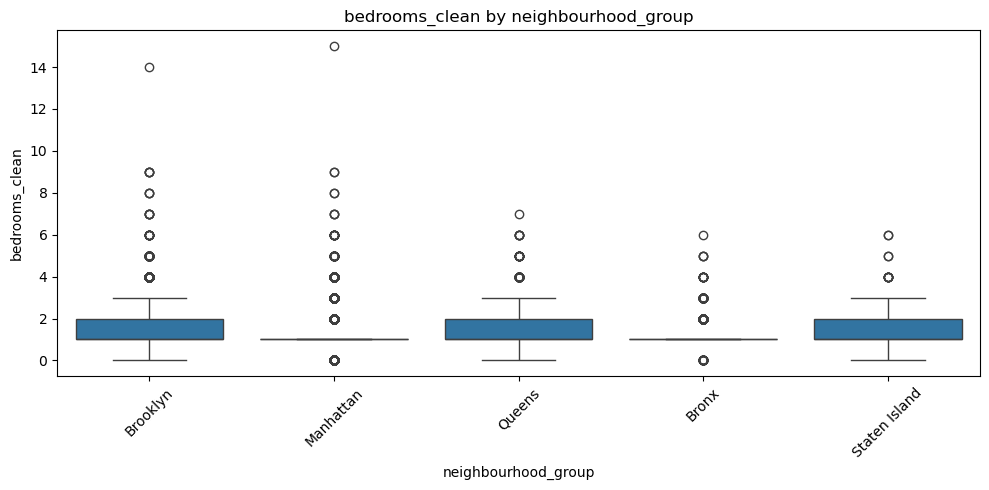

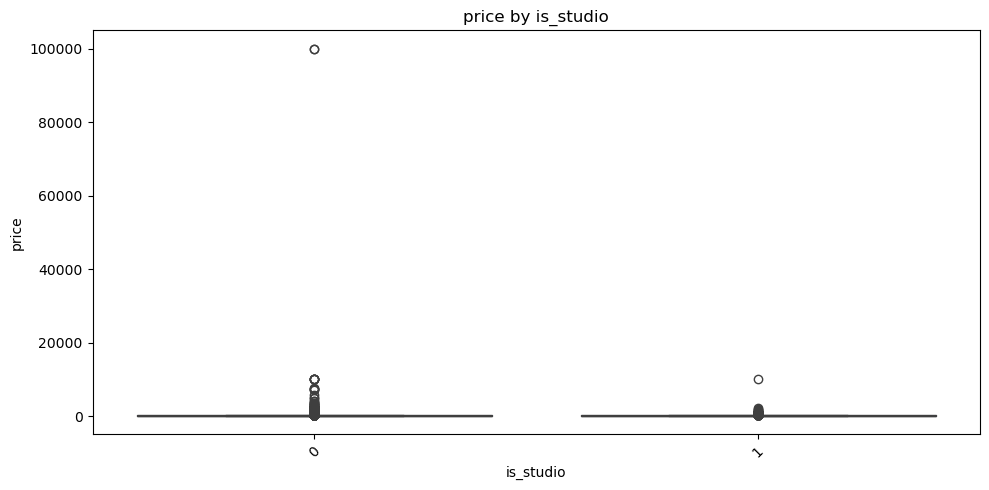

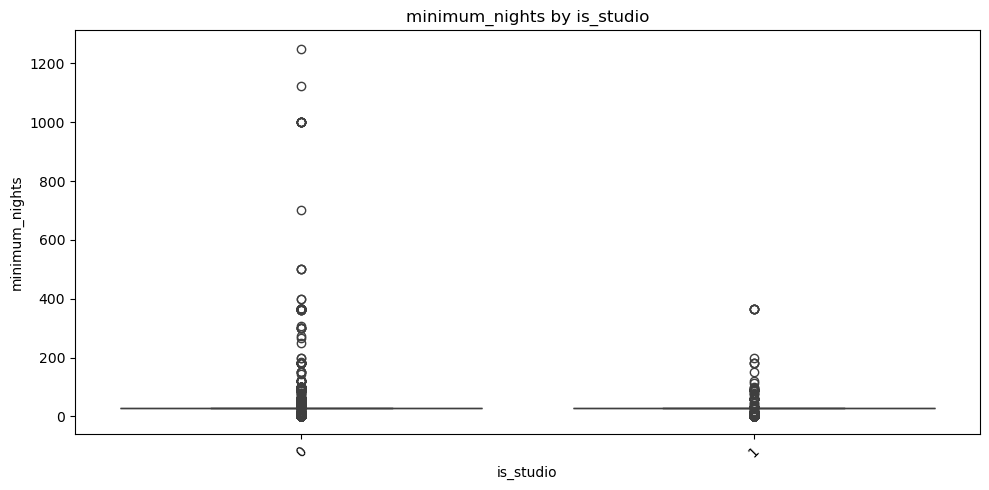

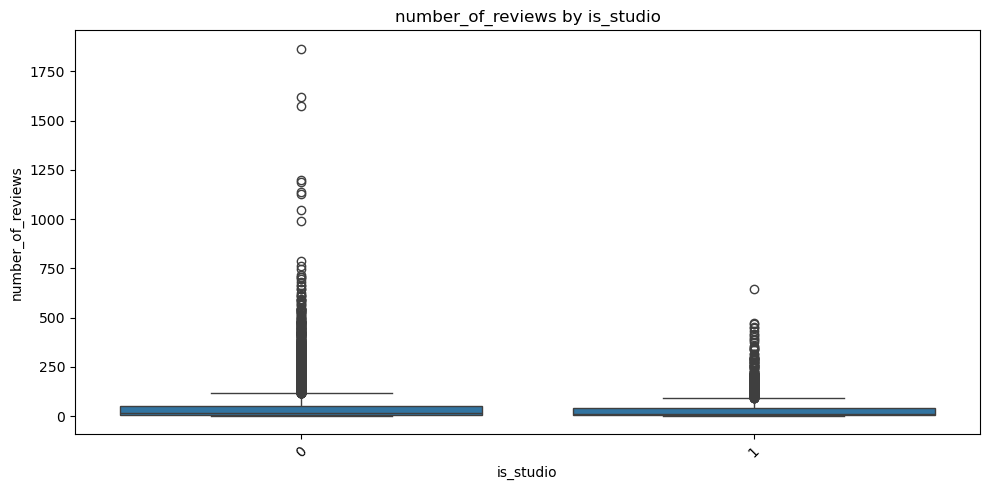

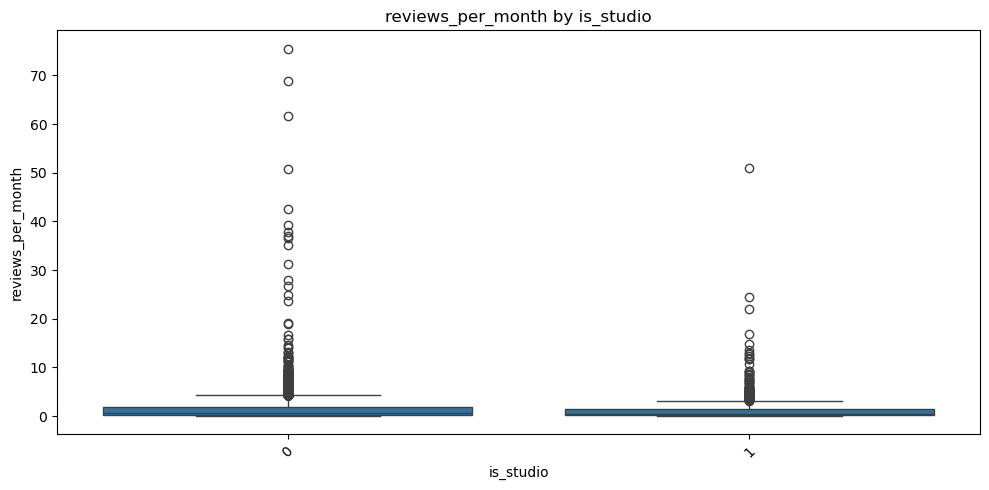

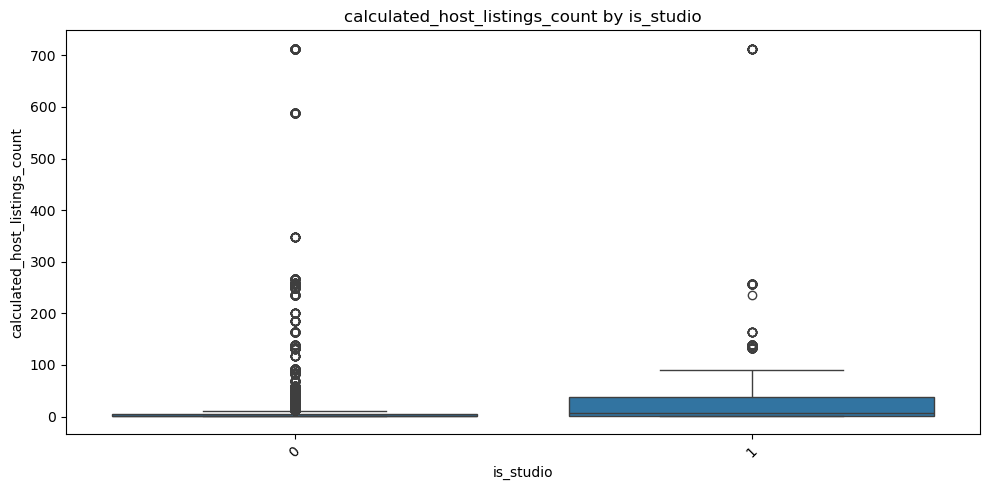

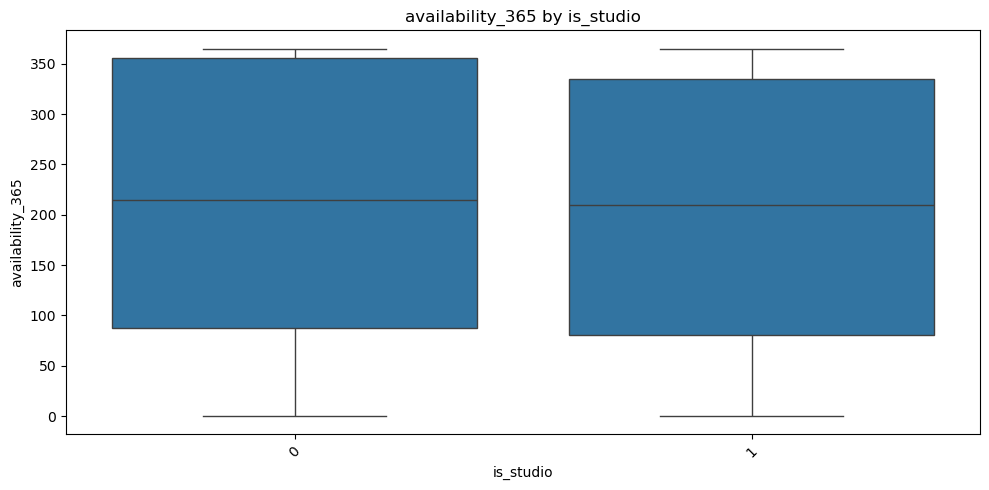

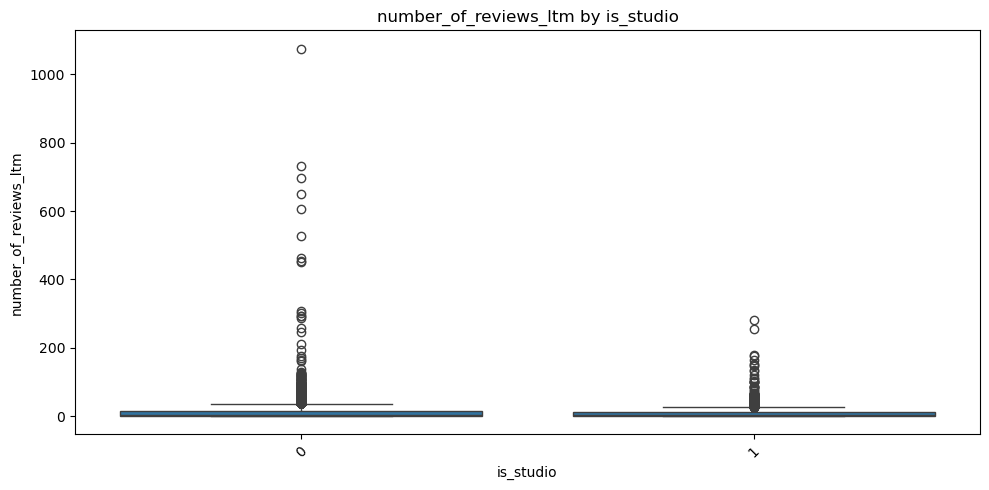

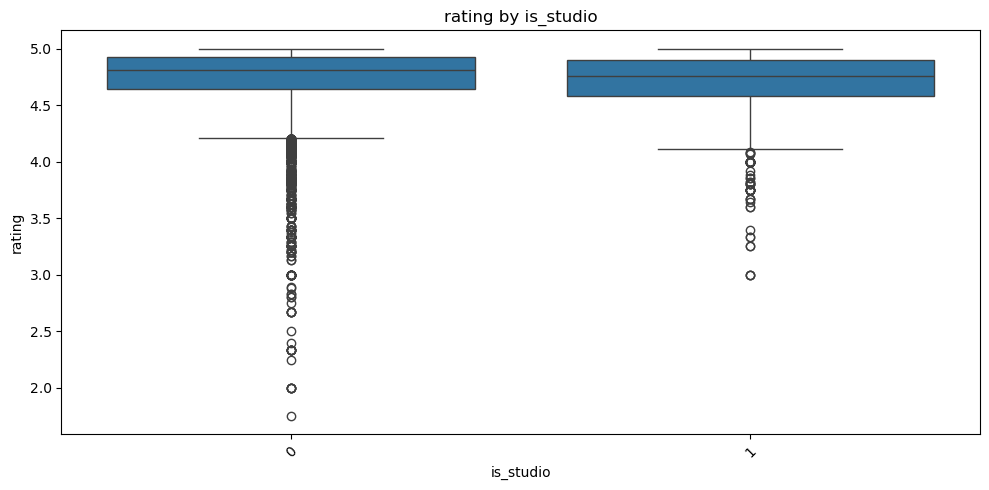

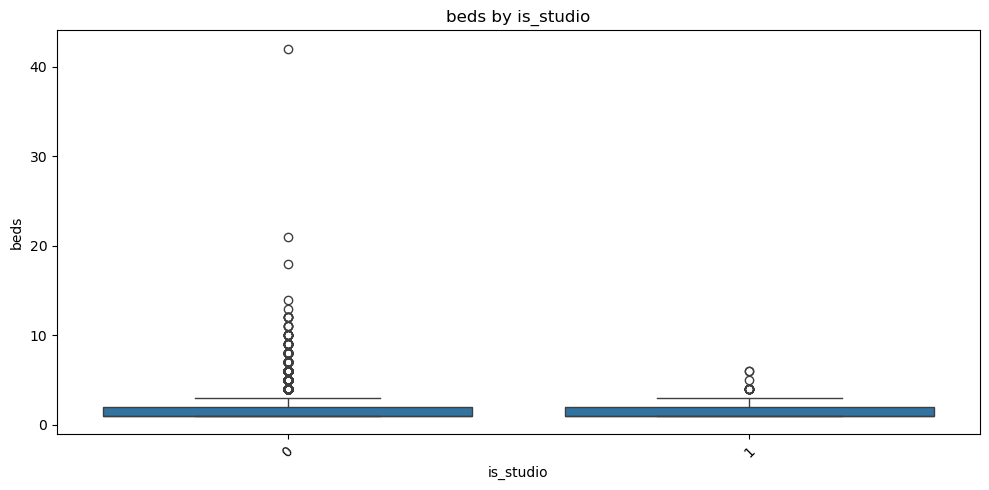

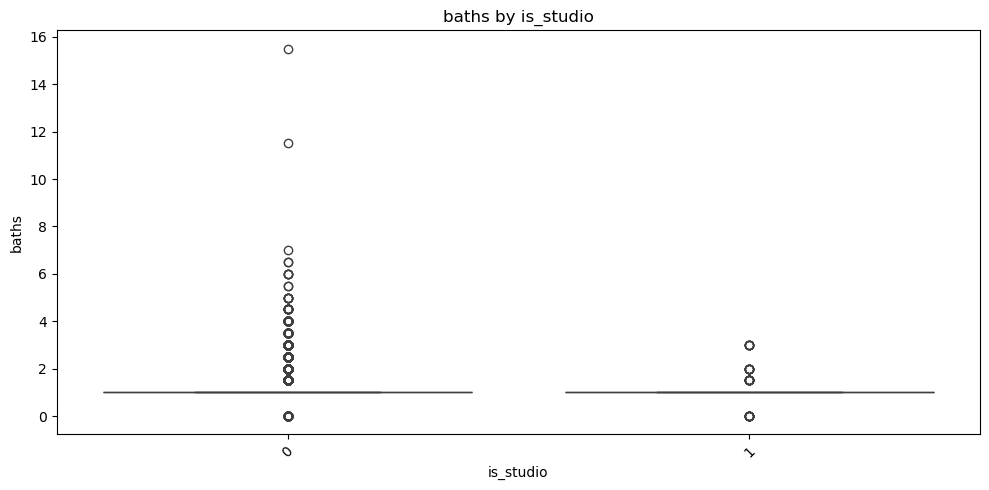

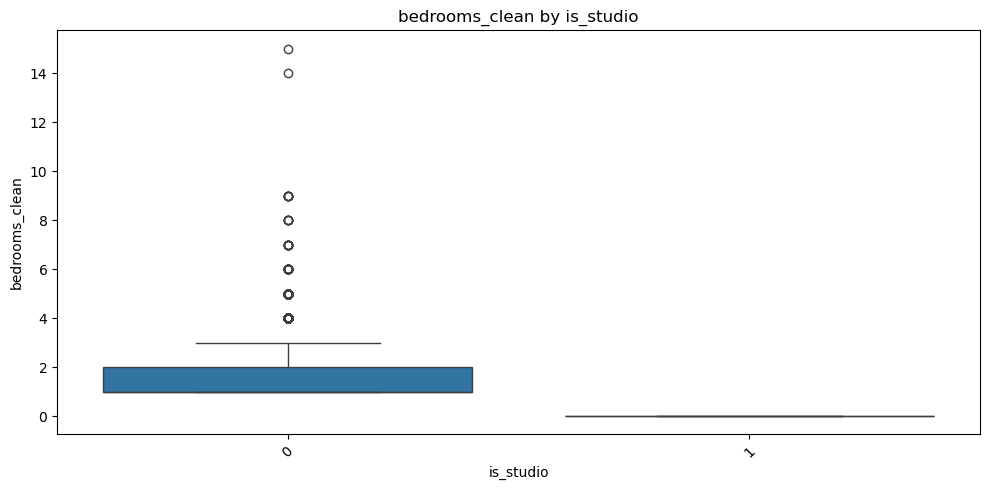

In [617]:
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=cat_col, y=num_col, data=data)
        plt.title(f"{num_col} by {cat_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


#### Multivariate Analysis

#### Price, Room Type, and Neighbourhood Group(Box Plot)

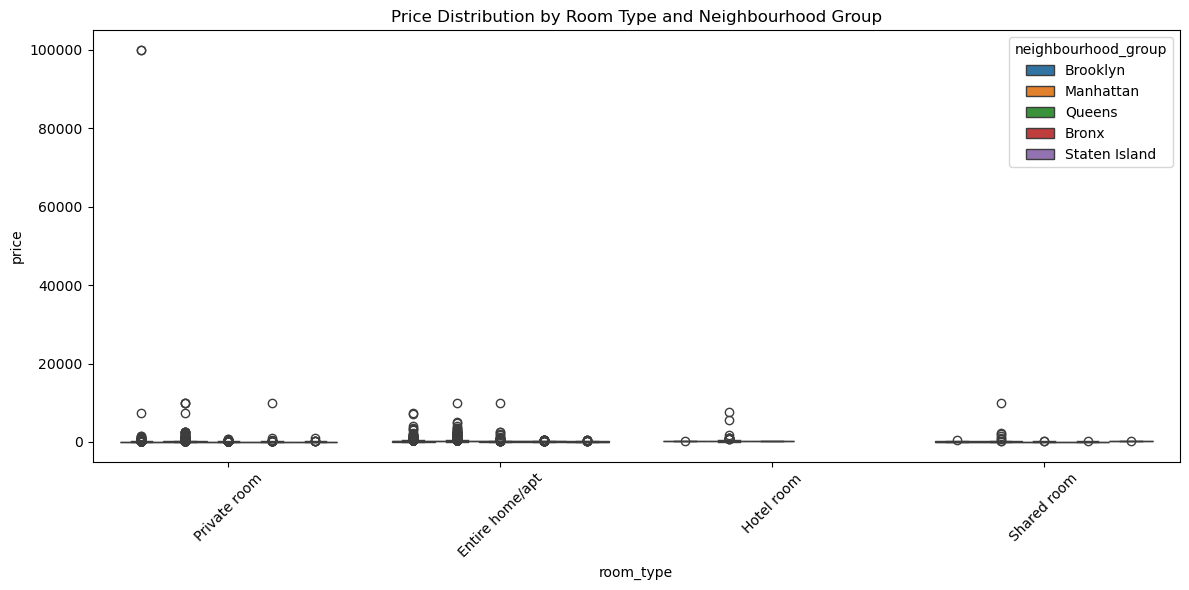

In [620]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', hue='neighbourhood_group', data=data)
plt.title('Price Distribution by Room Type and Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Price vs. Number of Reviews vs. Room Type (Bubble Plot)

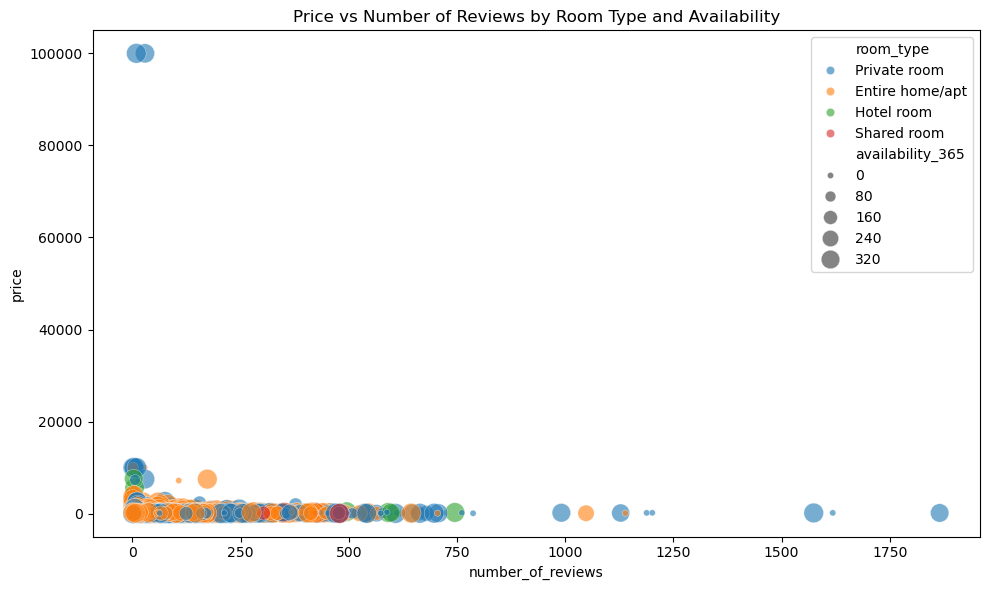

In [622]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='number_of_reviews',
    y='price',
    hue='room_type',
    size='availability_365',
    sizes=(20, 200),
    alpha=0.6
)
plt.title('Price vs Number of Reviews by Room Type and Availability')
plt.tight_layout()
plt.show()


####   Room Type vs. Price and Availability (Violin Plot):

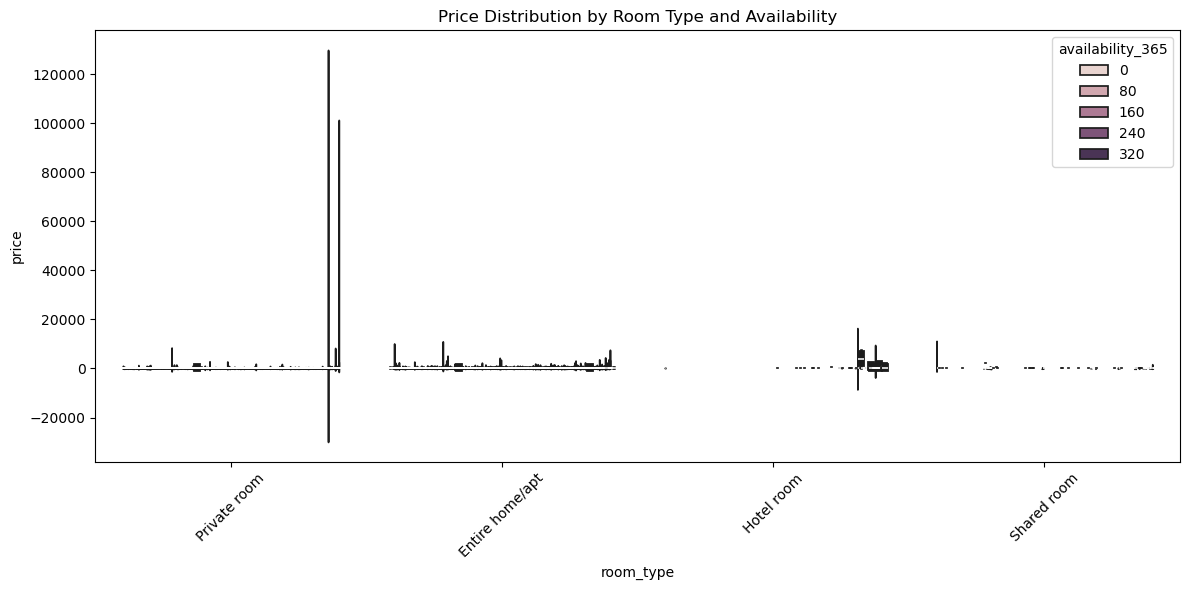

In [624]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='room_type', y='price', hue='availability_365', data=data, split=True)
plt.title('Price Distribution by Room Type and Availability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Price vs. Reviews per Month and Rating (Pairplot):

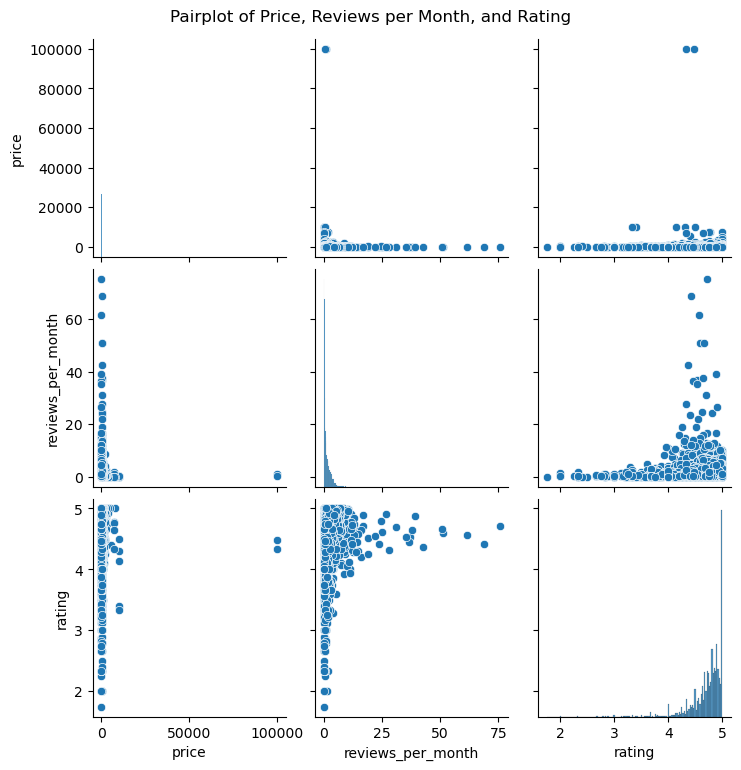

In [626]:
sns.pairplot(data[['price', 'reviews_per_month', 'rating']])
plt.suptitle('Pairplot of Price, Reviews per Month, and Rating', y=1.02)
plt.show()


#### Price vs. Beds and Bathrooms (FacetGrid)

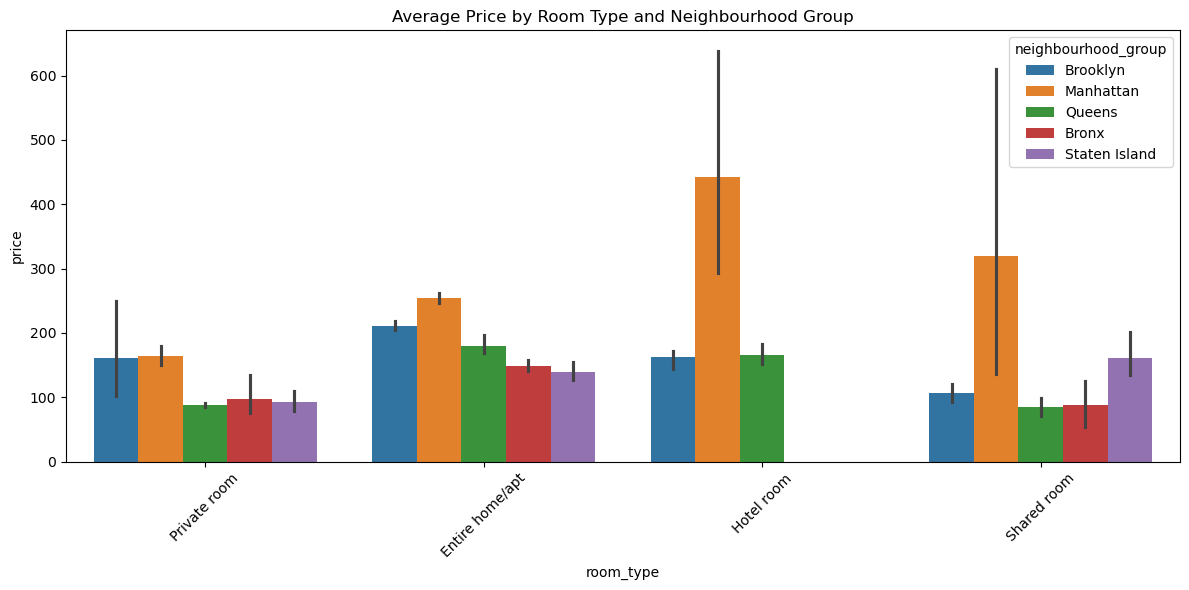

In [628]:
plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='price', hue='neighbourhood_group', data=data)
plt.title('Average Price by Room Type and Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Outlier Detection using the Graph

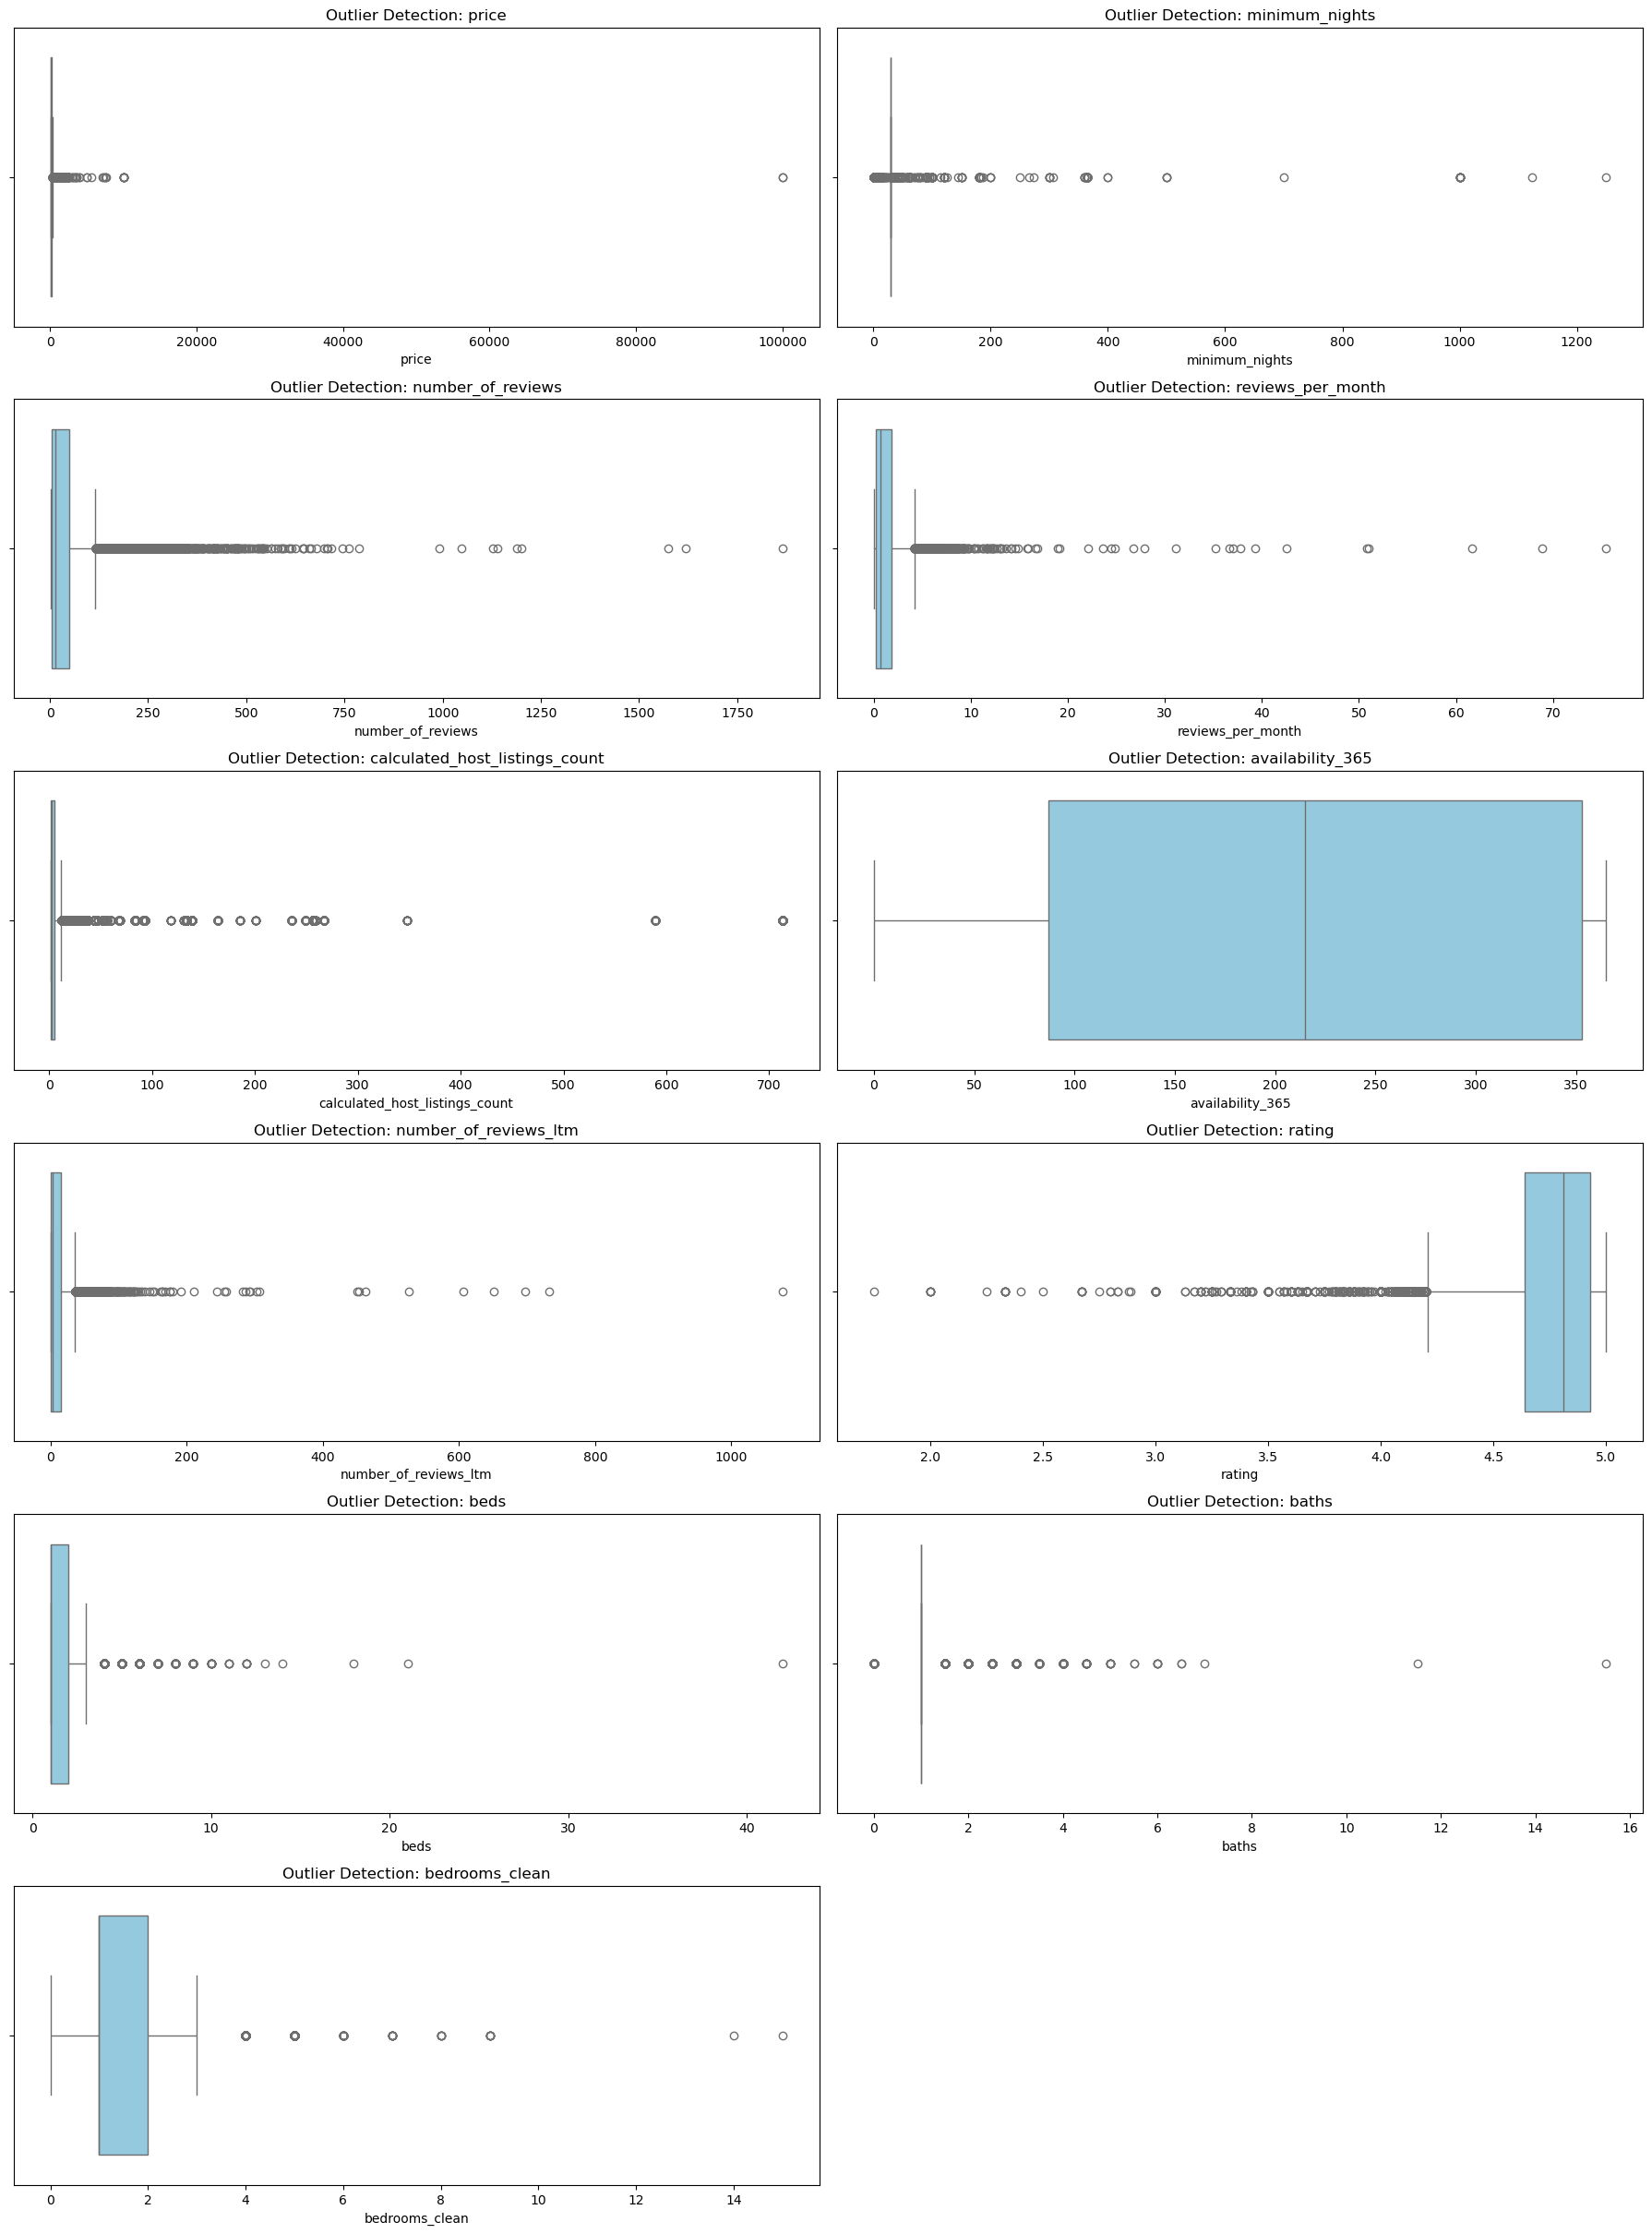

In [630]:
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                  'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm',
                  'rating', 'beds', 'baths', 'bedrooms_clean']

# Set plot size and layout
plt.figure(figsize=(18, len(numerical_cols)*4))

# Create boxplots for each numeric column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Outlier Detection: {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### Geographic Distribution (Latitude vs Longitude)

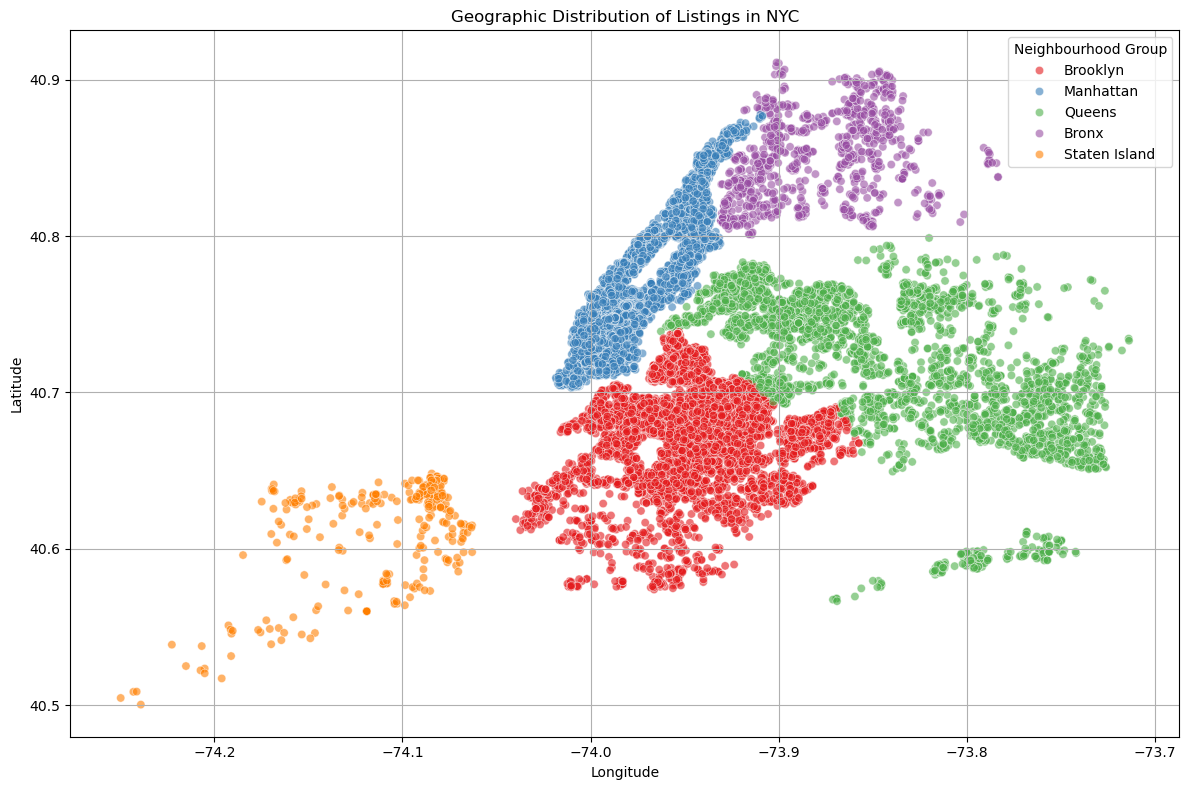

In [632]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data,
    x='longitude',
    y='latitude',
    hue='neighbourhood_group',
    alpha=0.6,
    palette='Set1'
)

plt.title('Geographic Distribution of Listings in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Review Trend Over Time

C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\436437171.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




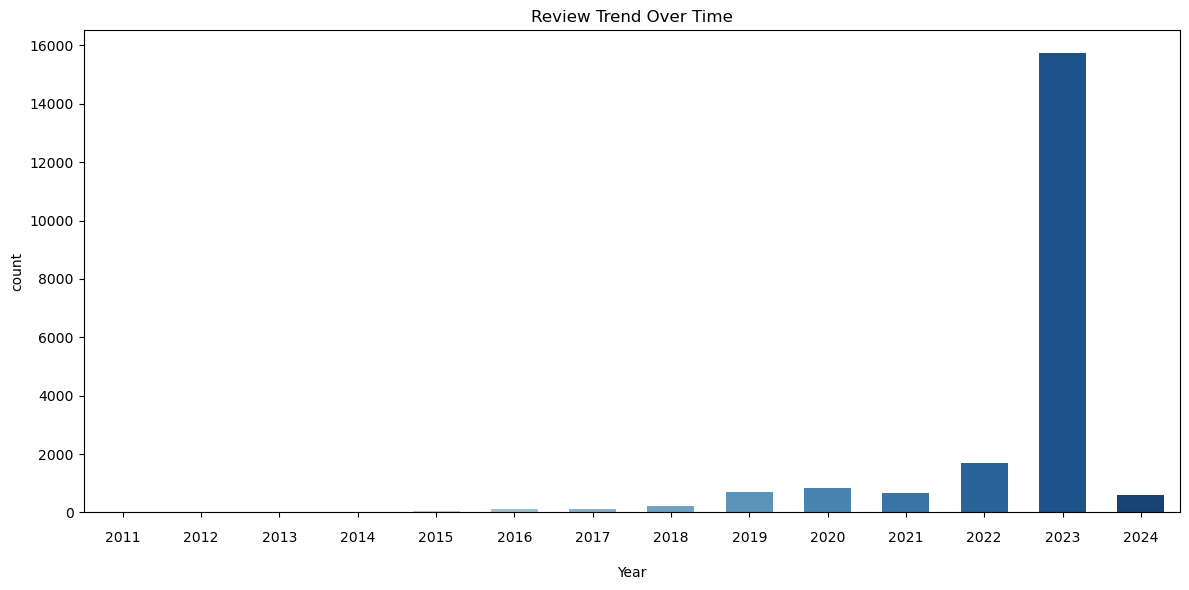

In [635]:


## Convert to datetime and extract year
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
data['year'] = data['last_review'].dt.year

#  Bigger canvas
plt.figure(figsize=(12, 6))

# Narrower bars (width < 1.0)
sns.countplot(
    data=data,
    x='year',
    palette='Blues',
    width=0.6        # default is around 0.8; smaller gives more space
)

#  Add padding between ticks and the axis
plt.tick_params(axis='x', which='major', pad=10)

#  Move the x-axis label away from the ticks
plt.xlabel('Year', labelpad=15)

plt.title('Review Trend Over Time')
plt.tight_layout()
plt.show()



#### Step 6: Feature Engineering

#### Create new features from existing ones (e.g., extract year from date)

In [646]:
# Essential feature engineering
data['price_per_bed'] = data['price'] / data['beds']
data['price_per_room'] = data['price'] / data['bedrooms_clean']
data['reviews_per_night'] = data['number_of_reviews'] / data['minimum_nights']
data['reviews_per_month'].fillna(0, inplace=True)
data['availability_ratio'] = data['availability_365'] / 365
data['last_review_year'] = data['last_review'].dt.year
data['listing_age'] = 2025 - data['last_review_year']
data['is_luxury'] = data['price'].apply(lambda x: 1 if x > 1000 else 0)



C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\1859799066.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [648]:
print(data[['price_per_bed', 'price_per_room', 'reviews_per_night',
            'availability_ratio', 'listing_age', 'is_luxury']].describe())


       price_per_bed  price_per_room  reviews_per_night  availability_ratio  \
count   20758.000000         20758.0       20758.000000        20758.000000   
mean      125.589429             inf           7.543117            0.564357   
std      1002.561651            <NA>          43.072744            0.370103   
min         3.333333             5.0           0.001000            0.000000   
25%        55.000000            67.5           0.166667            0.238356   
50%        85.000000           103.5           0.666667            0.589041   
75%       131.000000           175.0           2.500000            0.967123   
max    100000.000000             inf        1865.000000            1.000000   

        listing_age     is_luxury  
count  20758.000000  20758.000000  
mean       2.530831      0.008093  
std        1.375597      0.089600  
min        1.000000      0.000000  
25%        2.000000      0.000000  
50%        2.000000      0.000000  
75%        2.000000      0.000000  


In [650]:
# check missing values
print(data[['price_per_bed', 'price_per_room']].isna().sum())


price_per_bed     0
price_per_room    0
dtype: int64


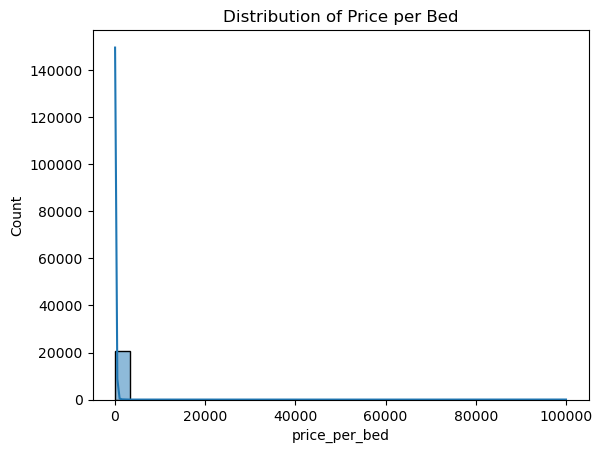

In [652]:
# Example: Histogram of price_per_bed
sns.histplot(data['price_per_bed'].dropna(), kde=True, bins=30)
plt.title('Distribution of Price per Bed')
plt.show()


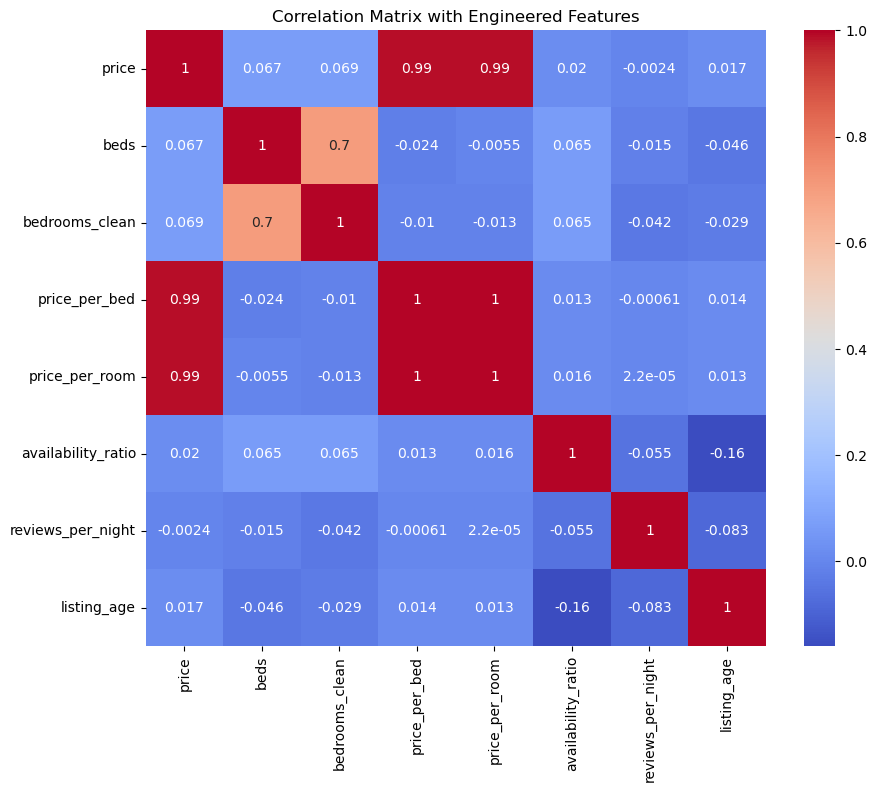

In [653]:
# Add to your correlation matrix
corr = data[['price', 'beds', 'bedrooms_clean', 'price_per_bed', 
             'price_per_room', 'availability_ratio', 'reviews_per_night', 'listing_age']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Engineered Features')
plt.show()


In [655]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20758 non-null  int64         
 1   name                            20758 non-null  object        
 2   host_id                         20758 non-null  int64         
 3   host_name                       20758 non-null  object        
 4   neighbourhood_group             20758 non-null  object        
 5   neighbourhood                   20758 non-null  object        
 6   latitude                        20758 non-null  float64       
 7   longitude                       20758 non-null  float64       
 8   room_type                       20758 non-null  object        
 9   price                           20758 non-null  float64       
 10  minimum_nights                  20758 non-null  int64         
 11  nu

In [658]:
data.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,bedrooms_clean,license_grouped,year,price_per_bed,price_per_room,reviews_per_night,availability_ratio,last_review_year,listing_age,is_luxury
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,1,No License,2015,55.0,55.0,0.1,0.000000,2015,10,0
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2,No License,2023,144.0,72.0,0.3,0.997260,2023,2,0
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1,Exempt,2023,93.5,187.0,3.0,0.939726,2023,2,0
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1,No License,2023,120.0,120.0,5.2,0.994521,2023,2,0


In [660]:
data.to_csv("Newyork_2024_clean.csv", index=False)

#### Data Modeling

In [663]:
# Create surrogate keys using continuous numbers
data['Listing_ID'] = range(1, len(data) + 1)
data['Host_ID'] = range(1, len(data) + 1)
data['Location_ID'] = range(1, len(data) + 1)
data['License_ID'] = range(1, len(data) + 1)
data['Property_ID'] = range(1, len(data) + 1)

In [665]:
data.rename(columns={'host_id': 'host_number'}, inplace=True)

In [667]:
data.head()


,id,name,host_number,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_night,availability_ratio,last_review_year,listing_age,is_luxury,Listing_ID,Host_ID,Location_ID,License_ID,Property_ID
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.100000,0.000000,2015,10,0,1,1,1,1,1
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.300000,0.997260,2023,2,0,2,2,2,2,2
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,3.000000,0.939726,2023,2,0,3,3,3,3,3
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,5.200000,0.994521,2023,2,0,4,4,4,4,4
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.366667,0.917808,2023,2,0,5,5,5,5,5


In [669]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20758 non-null  int64         
 1   name                            20758 non-null  object        
 2   host_number                     20758 non-null  int64         
 3   host_name                       20758 non-null  object        
 4   neighbourhood_group             20758 non-null  object        
 5   neighbourhood                   20758 non-null  object        
 6   latitude                        20758 non-null  float64       
 7   longitude                       20758 non-null  float64       
 8   room_type                       20758 non-null  object        
 9   price                           20758 non-null  float64       
 10  minimum_nights                  20758 non-null  int64         
 11  nu

#### Star Schema Structure: Splitting into Fact and Dimensions

In [672]:
# Fact Table
fact_listing = data[[
    'Listing_ID', 'Host_ID', 'Location_ID', 'License_ID', 'Property_ID',
    'room_type', 'price', 'minimum_nights', 'number_of_reviews',
    'last_review', 'reviews_per_month', 'calculated_host_listings_count',
    'availability_365', 'number_of_reviews_ltm', 'rating', 'beds', 'baths',
    'is_studio', 'bedrooms_clean', 'price_per_bed', 'price_per_room',
    'reviews_per_night', 'availability_ratio', 'last_review_year',
    'listing_age', 'is_luxury', 'year'
]]

# Dimension Table: Host
dim_host = data[['Host_ID', 'host_number', 'host_name']].drop_duplicates()

# Dimension Table: Location
dim_location = data[['Location_ID', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude']].drop_duplicates()

# Dimension Table: License
dim_license = data[['License_ID', 'license', 'license_grouped']].drop_duplicates()

# Dimension Table: Property (renamed 'id' and 'name' for clarity)
dim_property = data[['Property_ID', 'id', 'name', 'bedrooms']].drop_duplicates()

#### Cleaning Missing Data Using Median


In [675]:
dim_property = dim_property.rename(columns={
    'id': 'original_property_id',
    'name': 'property_name'
})

In [677]:
# Replace missing ratings with the median rating of listings with reviews
median_rating = fact_listing['rating'].median()
fact_listing['rating'].fillna(median_rating, inplace=True)


C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\1125992724.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\1125992724.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [679]:
fact_listing['price_per_room'].describe()


count    20758.0
mean         inf
std         <NA>
min          5.0
25%         67.5
50%        103.5
75%        175.0
max          inf
Name: price_per_room, dtype: Float64

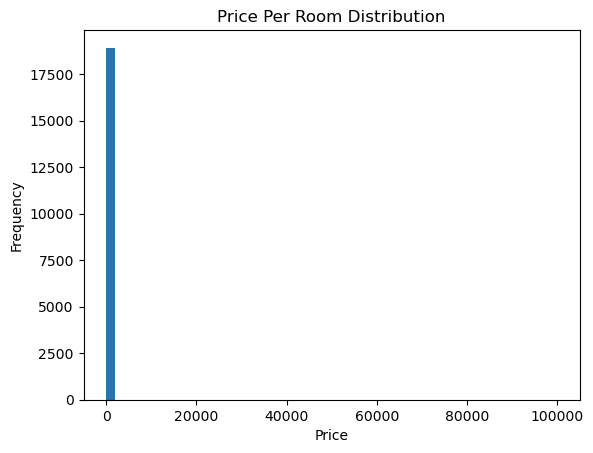

In [681]:
filtered_prices = fact_listing[fact_listing['price_per_room'].apply(np.isfinite)]['price_per_room']

plt.hist(filtered_prices, bins=50)
plt.title("Price Per Room Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [683]:
# Replace inf with NaN
fact_listing['price_per_room'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with median
median_price = fact_listing['price_per_room'].median()
fact_listing['price_per_room'].fillna(median_price, inplace=True)


C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\759781796.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\759781796.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\wasee\AppData\Local\Temp\ipykernel_20112\759781796.py:6: FutureWarning:

A value is trying to be set on a copy o

In [685]:
fact_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Listing_ID                      20758 non-null  int64         
 1   Host_ID                         20758 non-null  int64         
 2   Location_ID                     20758 non-null  int64         
 3   License_ID                      20758 non-null  int64         
 4   Property_ID                     20758 non-null  int64         
 5   room_type                       20758 non-null  object        
 6   price                           20758 non-null  float64       
 7   minimum_nights                  20758 non-null  int64         
 8   number_of_reviews               20758 non-null  int64         
 9   last_review                     20758 non-null  datetime64[ns]
 10  reviews_per_month               20758 non-null  float64       
 11  ca

In [687]:
dim_host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Host_ID      20758 non-null  int64 
 1   host_number  20758 non-null  int64 
 2   host_name    20758 non-null  object
dtypes: int64(2), object(1)
memory usage: 486.6+ KB


In [689]:
dim_license.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   License_ID       20758 non-null  int64 
 1   license          20758 non-null  object
 2   license_grouped  20758 non-null  object
dtypes: int64(1), object(2)
memory usage: 486.6+ KB


In [691]:
dim_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location_ID          20758 non-null  int64  
 1   neighbourhood        20758 non-null  object 
 2   neighbourhood_group  20758 non-null  object 
 3   latitude             20758 non-null  float64
 4   longitude            20758 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 811.0+ KB


In [693]:
dim_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Property_ID           20758 non-null  int64 
 1   original_property_id  20758 non-null  int64 
 2   property_name         20758 non-null  object
 3   bedrooms              20758 non-null  object
dtypes: int64(2), object(2)
memory usage: 648.8+ KB


####  Export Cleaned Data for Power BI

In [696]:
# Create directory if it doesn't exist
os.makedirs("new_york_2024", exist_ok=True)


In [698]:
# Save all as CSVs
fact_listing.to_csv("new_york_2024/fact_listing.csv", index=False)
dim_host.to_csv("new_york_2024/dim_host.csv", index=False)
dim_location.to_csv("new_york_2024/dim_location.csv", index=False)
dim_license.to_csv("new_york_2024/dim_license.csv", index=False)
dim_property.to_csv("new_york_2024/dim_property.csv", index=False)

In [699]:
print("Data export complete. All fact and dimension tables have been saved for Power BI analysis.")


Data export complete. All fact and dimension tables have been saved for Power BI analysis.
